In [674]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import json

In [675]:
%matplotlib inline

In [676]:
with open("data/all_data_final_Derbyshire.json", "r") as f:
    data = json.loads(f.read())

In [677]:
data[0]

{'county': 'Derbyshire',
 'code': 'E00098112',
 'lad': 'Amber Valley',
 'rgn_main': 'East Midlands',
 'population': 250,
 'amenities': [{'name': 'N/A',
   'amenity': 'post_box',
   'data_type': 'node',
   'lat': '53.0955954',
   'lon': '-1.3784729',
   'other_tags': {'amenity': 'post_box'}},
  {'name': 'Wesley Methodist Church',
   'amenity': 'place_of_worship',
   'data_type': 'way',
   'lat': '53.0964645',
   'lon': '-1.3803576',
   'other_tags': {'addr:city': 'Alfreton',
    'addr:postcode': 'DE55 7HW',
    'addr:street': 'Ellesmere Avenue',
    'amenity': 'place_of_worship',
    'building': 'yes',
    'denomination': 'methodist',
    'ele': '133',
    'name': 'Wesley Methodist Church',
    'old_fhrs:id': '983997',
    'religion': 'christian',
    'website': 'https://alfretonwesley.co.uk/'}},
  {'name': 'Breath of Life Clinic',
   'amenity': 'healthcare',
   'data_type': 'way',
   'lat': '53.0956675',
   'lon': '-1.3783229',
   'other_tags': {'amenity': 'healthcare',
    'building':

## Do some lookups

In [678]:
urban_rural_lookup = pd.read_csv('RUC11_OA11_EW.csv')
oa11_oa21_lookup = pd.read_csv('Output_Areas_(2011)_to_Output_Areas_(2021)_to_Local_Authority_District_(2022)_Lookup_in_England_and_Wales_(Version_2).csv')
oa_parish_lookup = pd.read_csv('oa_to_parishes.csv')
imd_lookup = pd.read_csv('imd_lookup.csv', thousands=",")
oa11_lsoa11_lookup = pd.read_csv(
    'Output_Area_to_Lower_layer_Super_Output_Area_to_Middle_layer_Super_Output_Area_to_Local_Authority_District_(December_2011)_Lookup_in_England_and_Wales.csv',
)
parish_size_lookup = pd.read_csv('Parishes_and_Non_Civil_Parished_Areas_(December_2022)_EW_BFC.csv')

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_22568/3325571511.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  oa11_oa21_lookup = pd.read_csv('Output_Areas_(2011)_to_Output_Areas_(2021)_to_Local_Authority_District_(2022)_Lookup_in_England_and_Wales_(Version_2).csv')
/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_22568/3325571511.py:3: DtypeWarning: Columns (4,7,10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  oa_parish_lookup = pd.read_csv('oa_to_parishes.csv')
/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_22568/3325571511.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  oa11_lsoa11_lookup = pd.read_csv(


In [679]:
parish_size_lookup.head()

,OBJECTID,PARNCP22CD,PARNCP22NM,PARNCP22NW,BNG_E,BNG_N,LONG,LAT,GlobalID,SHAPE_Length,SHAPE_Area
0,1,E04000001,Blackrod,,361040,410661,-2.59006,53.591080,{2E0AFD20-B369-412A-BFD3-B7FD5FB9CF40},17261.857493,8.605171e+06
1,2,E04000002,Horwich,,365741,411963,-2.51919,53.603111,{7D52B4BA-1C0D-4F41-B15C-2114EC98E7B2},22234.911763,1.423806e+07
2,3,E04000003,Westhoughton,,365008,406179,-2.52961,53.551079,{3E373267-1AF9-41FF-9351-B7B8CE85FC13},23327.862894,1.786362e+07
3,4,E04000004,Ringway,,381192,384606,-2.28405,53.358009,{253454DB-6853-4FEA-B90C-6CDD72A7BEAC},14425.838285,6.548172e+06
4,5,E04000005,Saddleworth,,400672,407034,-1.99132,53.559940,{7C127291-CD0E-4204-8524-4DDCFA44EE76},44464.699193,7.611406e+07


In [680]:
big_df = oa_parish_lookup[[
    'OA21CD',
    'PAR22CD',
    'PAR22NM',
    'RGN22NM'
]].merge(
    parish_size_lookup[[
        'PARNCP22CD', 'SHAPE_Area'
    ]], how='left', left_on='PAR22CD', right_on='PARNCP22CD'
).merge(
    oa11_oa21_lookup[[
    'OA11CD', 'OA21CD'
]], how='left', on='OA21CD').merge(
    urban_rural_lookup[[
        'OA11CD',
        'RUC11'
    ]], how='left', on='OA11CD'
).merge(
    oa11_lsoa11_lookup[[
    'OA11CD', 'LSOA11CD'
]], how='left', on='OA11CD').merge(
    imd_lookup[[
        '_LSOA11CD',
        'IMD19'
    ]], how='left', left_on='LSOA11CD', right_on='_LSOA11CD'
)

In [681]:
big_df[pd.isnull(big_df.IMD19)].groupby(['RGN22NM']).size()

RGN22NM
East Midlands                 724
East of England              1002
London                       1479
North East                    328
North West                    792
South East                   1392
South West                    828
Wales                       10293
West Midlands                 720
Yorkshire and The Humber      544
dtype: int64

In [682]:
big_df.head()

,OA21CD,PAR22CD,PAR22NM,RGN22NM,PARNCP22CD,SHAPE_Area,OA11CD,RUC11,LSOA11CD,_LSOA11CD,IMD19
0,E00060311,E04000255,Dalton Piercy,North East,E04000255,4.065362e+06,E00060311,Rural village,E01011959,E01011959,22123.0
1,E00060356,E04000257,Greatham,North East,E04000257,4.318995e+06,E00060356,Urban city and town,E01011968,E01011968,14530.0
2,E00060360,E04000257,Greatham,North East,E04000257,4.318995e+06,E00060360,Urban city and town,E01011968,E01011968,14530.0
3,E00060357,E04000257,Greatham,North East,E04000257,4.318995e+06,E00060357,Rural town and fringe,E01011968,E01011968,14530.0
4,E00060359,E04000257,Greatham,North East,E04000257,4.318995e+06,E00060359,Urban city and town,E01011968,E01011968,14530.0


### Dropping Wales

In [683]:
big_df = big_df[big_df.RGN22NM != "Wales"]

In [684]:
big_df[pd.isnull(big_df.SHAPE_Area)].groupby(['RGN22NM']).size() 

RGN22NM
East Midlands      250
East of England    354
dtype: int64

In [685]:
big_df.groupby(['RGN22NM']).size() 

RGN22NM
East Midlands               15430
East of England             19997
London                      26532
North East                   9130
North West                  24135
South East                  29030
South West                  18472
West Midlands               18636
Yorkshire and The Humber    17819
dtype: int64

In [686]:
big_df.isna().mean()

OA21CD        0.000000
PAR22CD       0.000000
PAR22NM       0.000000
RGN22NM       0.000000
PARNCP22CD    0.003371
SHAPE_Area    0.003371
OA11CD        0.043582
RUC11         0.043582
LSOA11CD      0.043582
_LSOA11CD     0.043582
IMD19         0.043582
dtype: float64

In [687]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')

In [688]:
loss_dict = {}
for region, frame in big_df.groupby('RGN22NM'):
    na_df = (frame.isnull().sum() / len(frame)) * 100      
    na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
    loss_dict[region]  = na_df
loss_frame = pd.DataFrame(loss_dict).T
loss_frame = loss_frame.fillna(0)
loss_frame

,IMD19,LSOA11CD,OA11CD,PARNCP22CD,RUC11,SHAPE_Area,_LSOA11CD
East Midlands,4.692158,4.692158,4.692158,1.620220,4.692158,1.620220,4.692158
East of England,5.010752,5.010752,5.010752,1.770266,5.010752,1.770266,5.010752
London,5.574401,5.574401,5.574401,0.000000,5.574401,0.000000,5.574401
North East,3.592552,3.592552,3.592552,0.000000,3.592552,0.000000,3.592552
North West,3.281541,3.281541,3.281541,0.000000,3.281541,0.000000,3.281541
South East,4.795040,4.795040,4.795040,0.000000,4.795040,0.000000,4.795040
South West,4.482460,4.482460,4.482460,0.000000,4.482460,0.000000,4.482460
West Midlands,3.863490,3.863490,3.863490,0.000000,3.863490,0.000000,3.863490
Yorkshire and The Humber,3.052921,3.052921,3.052921,0.000000,3.052921,0.000000,3.052921


In [689]:
loss_frame = loss_frame[['RUC11', 'SHAPE_Area']]
loss_frame.columns = ['Urban_Rural', 'Area']
loss_frame

,Urban_Rural,Area
East Midlands,4.692158,1.620220
East of England,5.010752,1.770266
London,5.574401,0.000000
North East,3.592552,0.000000
North West,3.281541,0.000000
South East,4.795040,0.000000
South West,4.482460,0.000000
West Midlands,3.863490,0.000000
Yorkshire and The Humber,3.052921,0.000000


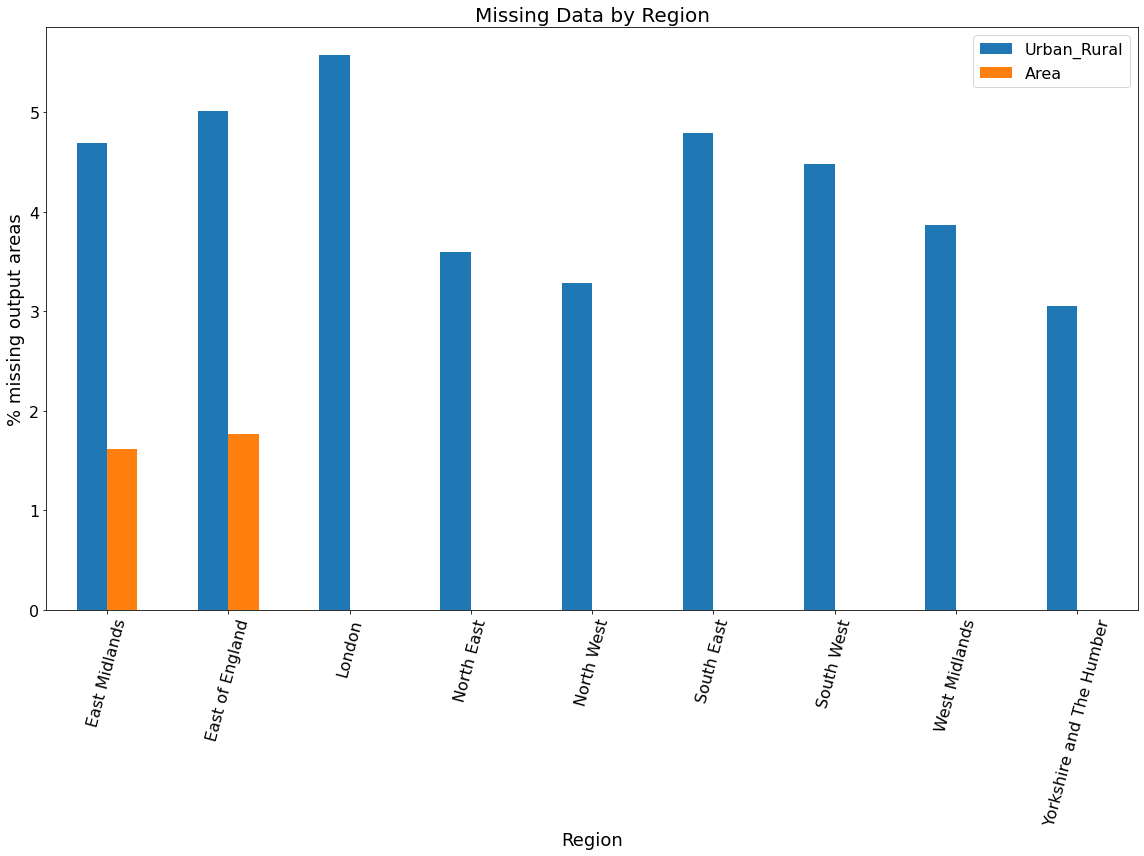

In [690]:
fig, ax = plt.subplots(figsize=(16,12))
loss_frame.plot(ax=ax, kind='bar')
plt.xlabel('Region', fontsize=18)
plt.ylabel('% missing output areas', fontsize=18)
plt.xticks(fontsize=16, rotation=75)
plt.yticks(fontsize=16)
plt.title('Missing Data by Region', fontsize=20)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig('missing_data_by_region.png')
plt.show()

In [691]:
import os
import glob

In [692]:
big_df.head()

,OA21CD,PAR22CD,PAR22NM,RGN22NM,PARNCP22CD,SHAPE_Area,OA11CD,RUC11,LSOA11CD,_LSOA11CD,IMD19
0,E00060311,E04000255,Dalton Piercy,North East,E04000255,4.065362e+06,E00060311,Rural village,E01011959,E01011959,22123.0
1,E00060356,E04000257,Greatham,North East,E04000257,4.318995e+06,E00060356,Urban city and town,E01011968,E01011968,14530.0
2,E00060360,E04000257,Greatham,North East,E04000257,4.318995e+06,E00060360,Urban city and town,E01011968,E01011968,14530.0
3,E00060357,E04000257,Greatham,North East,E04000257,4.318995e+06,E00060357,Rural town and fringe,E01011968,E01011968,14530.0
4,E00060359,E04000257,Greatham,North East,E04000257,4.318995e+06,E00060359,Urban city and town,E01011968,E01011968,14530.0


In [693]:
def fn_to_county(name):
    return name.split('_')[-1].split('.')[0]


def group_by_parish(data):
    parish_data = {}
    for entry in data:
        parish_name = big_df[big_df.OA21CD == entry['code']].PAR22NM.values[0]
        ruc_11_type = big_df[big_df.OA21CD == entry['code']].RUC11.values[0]
        region_name = big_df[big_df.OA21CD == entry['code']].RGN22NM.values[0]
        imd_value = big_df[big_df.OA21CD == entry['code']].IMD19.values[0]
        parish_size = big_df[big_df.OA21CD == entry['code']].SHAPE_Area.values[0]
        try:
            parish_data[parish_name]['population'] += entry['population']
            parish_data[parish_name]['region'] = region_name
            parish_data[parish_name]['size'] = parish_size
            parish_data[parish_name]['classification'].append(
                {'population': entry['population'], 'classy': ruc_11_type, 'imd_class': imd_value}
            )
            for am in entry['amenities']:
                parish_data[parish_name]['amenities'].append(am)
        except:
            parish_data[parish_name] = {
                'population': entry['population'],
                'size': parish_size,
                'region': region_name,
                'classification': [{'population': entry['population'], 'classy': ruc_11_type, 'imd_class': imd_value}],              
                'amenities': [am for am in entry['amenities']]
            }
    return parish_data
    

overall_dict = {}
for result in glob.iglob('all_data_final_*.json'):
    name = fn_to_county(result)
    with open(result, 'r') as f:
        data = json.loads(f.read())
    by_parish = group_by_parish(data)
    print("Finished for {0}".format(name))
    overall_dict[name] = by_parish
    

Finished for North Yorkshire
Finished for Warwickshire
Finished for Surrey
Finished for Lancashire
Finished for Leicestershire
Finished for Merseyside
Finished for West Yorkshire
Finished for Somerset
Finished for Worcestershire
Finished for Essex
Finished for Norfolk
Finished for Inner London
Finished for Hampshire
Finished for East Sussex
Finished for Nottinghamshire
Finished for Suffolk
Finished for West Midlands
Finished for Outer London
Finished for South Yorkshire
Finished for Lincolnshire
Finished for Kent
Finished for Cumbria
Finished for West Sussex
Finished for Cambridgeshire
Finished for Staffordshire
Finished for Devon
Finished for Derbyshire
Finished for Hertfordshire
Finished for Greater Manchester
Finished for Gloucestershire
Finished for Tyne and Wear
Finished for Oxfordshire


In [694]:
overall_dict.keys()

dict_keys(['North Yorkshire', 'Warwickshire', 'Surrey', 'Lancashire', 'Leicestershire', 'Merseyside', 'West Yorkshire', 'Somerset', 'Worcestershire', 'Essex', 'Norfolk', 'Inner London', 'Hampshire', 'East Sussex', 'Nottinghamshire', 'Suffolk', 'West Midlands', 'Outer London', 'South Yorkshire', 'Lincolnshire', 'Kent', 'Cumbria', 'West Sussex', 'Cambridgeshire', 'Staffordshire', 'Devon', 'Derbyshire', 'Hertfordshire', 'Greater Manchester', 'Gloucestershire', 'Tyne and Wear', 'Oxfordshire'])

In [695]:
overall_dict['North Yorkshire']['Great Ouseburn']

{'population': 623,
 'size': 8640773.77462502,
 'region': 'Yorkshire and The Humber',
 'classification': [{'population': 301,
   'classy': 'Rural village',
   'imd_class': 23792.0},
  {'population': 322, 'classy': 'Rural village', 'imd_class': 23792.0}],
 'amenities': [{'name': 'N/A',
   'amenity': 'post_box',
   'data_type': 'node',
   'lat': '54.0505813',
   'lon': '-1.3173559',
   'other_tags': {'amenity': 'post_box',
    'brand': 'Royal Mail',
    'brand:wikidata': 'Q638098',
    'brand:wikipedia': 'en:Royal Mail',
    'check_date': '2021-10-10',
    'operator': 'Royal Mail',
    'operator:wikidata': 'Q638098',
    'post_box:type': 'wall',
    'royal_cypher': 'GVIR'}},
  {'name': 'Great Ouseburn Post Office',
   'amenity': 'post_office',
   'data_type': 'node',
   'lat': '54.0505522',
   'lon': '-1.3174085',
   'other_tags': {'addr:country': 'GB',
    'addr:postcode': 'YO26 9RG',
    'amenity': 'post_office',
    'brand': 'Post Office',
    'brand:wikidata': 'Q1783168',
    'contac

In [696]:
overall_dict['Derbyshire']['Brampton']

{'population': 1188,
 'size': 21032320.9733524,
 'region': 'East Midlands',
 'classification': [{'population': 253,
   'classy': 'Urban city and town',
   'imd_class': 20478.0},
  {'population': 366,
   'classy': 'Rural hamlets and isolated dwellings',
   'imd_class': 20478.0},
  {'population': 318,
   'classy': 'Rural hamlets and isolated dwellings',
   'imd_class': 20478.0},
  {'population': 251, 'classy': 'Urban city and town', 'imd_class': 20478.0}],
 'amenities': [{'name': 'N/A',
   'amenity': 'post_box',
   'data_type': 'node',
   'lat': '53.2587062',
   'lon': '-1.4735172',
   'other_tags': {'amenity': 'post_box',
    'brand': 'Royal Mail',
    'brand:wikidata': 'Q638098',
    'brand:wikipedia': 'en:Royal Mail',
    'collection_times': 'Mo-Fr 09:00; Sa 07:00',
    'operator': 'Royal Mail',
    'operator:wikidata': 'Q638098',
    'post_box:type': 'lamp',
    'ref': 'S41 123D',
    'royal_cypher': 'EIIR'}},
  {'name': 'N/A',
   'amenity': 'post_box',
   'data_type': 'node',
   'la

In [697]:
import re

In [698]:
only_rural_dict = {}
for county, parish_dict in overall_dict.items():
    for parish, data in parish_dict.items():
        set_of_types = set([thing['classy'] for thing in data['classification']])
        if len([j for j in set_of_types if j == j and re.match('Rural*', j)]) == len(set_of_types):
            try:
                only_rural_dict[county][parish] = data
            except:
                only_rural_dict[county] = {parish: data}

In [699]:
len(only_rural_dict)

30

In [700]:
only_rural_dict['North Yorkshire']['Great Ouseburn']

{'population': 623,
 'size': 8640773.77462502,
 'region': 'Yorkshire and The Humber',
 'classification': [{'population': 301,
   'classy': 'Rural village',
   'imd_class': 23792.0},
  {'population': 322, 'classy': 'Rural village', 'imd_class': 23792.0}],
 'amenities': [{'name': 'N/A',
   'amenity': 'post_box',
   'data_type': 'node',
   'lat': '54.0505813',
   'lon': '-1.3173559',
   'other_tags': {'amenity': 'post_box',
    'brand': 'Royal Mail',
    'brand:wikidata': 'Q638098',
    'brand:wikipedia': 'en:Royal Mail',
    'check_date': '2021-10-10',
    'operator': 'Royal Mail',
    'operator:wikidata': 'Q638098',
    'post_box:type': 'wall',
    'royal_cypher': 'GVIR'}},
  {'name': 'Great Ouseburn Post Office',
   'amenity': 'post_office',
   'data_type': 'node',
   'lat': '54.0505522',
   'lon': '-1.3174085',
   'other_tags': {'addr:country': 'GB',
    'addr:postcode': 'YO26 9RG',
    'amenity': 'post_office',
    'brand': 'Post Office',
    'brand:wikidata': 'Q1783168',
    'contac

In [701]:
loss_dict = {}
for key, value in overall_dict.items():
    all_parishes = len(value)
    overall_population = np.sum([a['population'] for a in value.values()])
    overall_oa = np.sum([len(b['classification']) for b in value.values()])
    try:
        rural_only = only_rural_dict[key]
        rural_population = np.sum([c['population'] for c in rural_only.values()])
        rural_oa = np.sum([len(d['classification']) for d in rural_only.values()])
        rural_parishes = len(rural_only)
    except:
        rural_population = 0
        rural_oa = 0 
        rural_parishes = 0
    loss_dict[key] = {
        'overall_population': overall_population,
        'overall_oa': overall_oa,
        'overall_parishes': all_parishes,
        'rural_population': rural_population,
        'rural_oa': rural_oa,
        'rural_parishes': rural_parishes
    }

In [702]:
loss_df = pd.DataFrame(loss_dict).T
loss_df.sort_values(by='overall_population')

,overall_population,overall_oa,overall_parishes,rural_population,rural_oa,rural_parishes
Cumbria,499865,1744,257,225694,781,237
East Sussex,545857,1818,100,109130,352,73
Somerset,571526,1892,310,209826,705,268
Warwickshire,596780,1925,188,117423,394,151
Worcestershire,603662,1953,181,120361,384,142
North Yorkshire,615514,2106,527,271190,958,482
Gloucestershire,645093,2114,247,117672,386,183
Cambridgeshire,678847,2085,224,211708,658,175
Leicestershire,712367,2227,201,123516,386,139
Oxfordshire,725275,2201,286,155536,492,222


In [703]:
loss_df.loc[:, 'pct_population'] = 100*loss_df.rural_population / loss_df.overall_population
loss_df.loc[:, 'pct_oa'] = 100*loss_df.rural_oa / loss_df.overall_oa
loss_df.loc[:, 'pct_parishes'] = 100*loss_df.rural_parishes / loss_df.overall_parishes
loss_df

,overall_population,overall_oa,overall_parishes,rural_population,rural_oa,rural_parishes,pct_population,pct_oa,pct_parishes
North Yorkshire,615514,2106,527,271190,958,482,44.059112,45.489079,91.461101
Warwickshire,596780,1925,188,117423,394,151,19.676095,20.467532,80.319149
Surrey,1203079,3662,95,79167,257,48,6.580366,7.018023,50.526316
Lancashire,1235395,4024,209,154868,493,124,12.535910,12.251491,59.330144
Leicestershire,712367,2227,201,123516,386,139,17.338816,17.332735,69.154229
Merseyside,1423339,4768,27,8307,30,3,0.583628,0.629195,11.111111
West Yorkshire,2351646,7345,97,94305,302,44,4.010170,4.111641,45.360825
Somerset,571526,1892,310,209826,705,268,36.713290,37.262156,86.451613
Worcestershire,603662,1953,181,120361,384,142,19.938476,19.662058,78.453039
Essex,1503463,4792,302,259385,812,218,17.252503,16.944908,72.185430


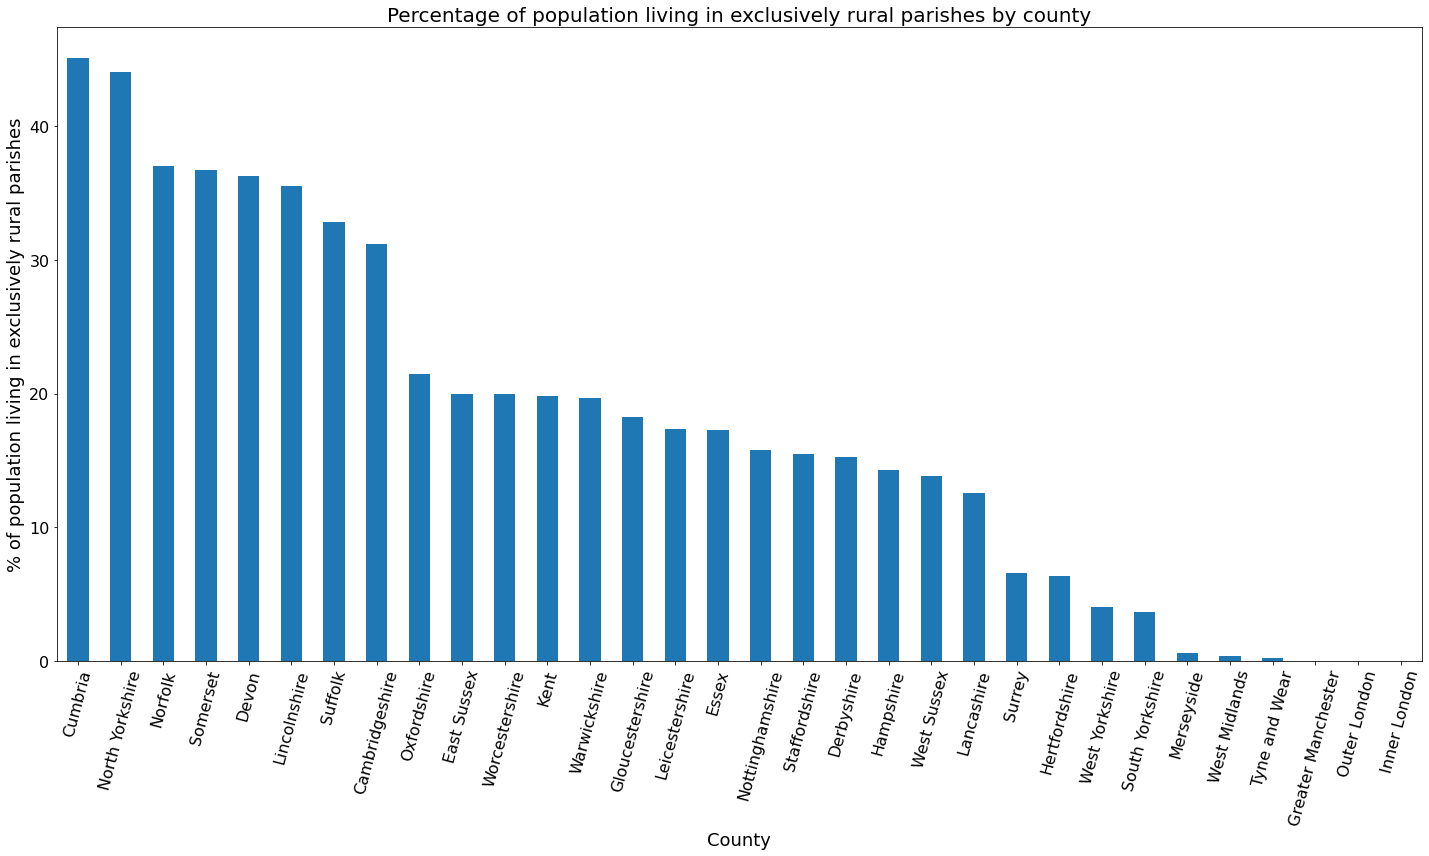

In [704]:
fig, ax = plt.subplots(figsize=(20,12))
loss_df.sort_values(by='pct_population', ascending=False).pct_population.plot(kind='bar', ax=ax)
plt.xlabel('County', fontsize=18)
plt.ylabel('% of population living in exclusively rural parishes', fontsize=18)
plt.xticks(fontsize=16, rotation=75)
plt.yticks(fontsize=16)
plt.title('Percentage of population living in exclusively rural parishes by county', fontsize=20)
plt.tight_layout()
plt.savefig('pct_exclusive_rural.png')
plt.show()

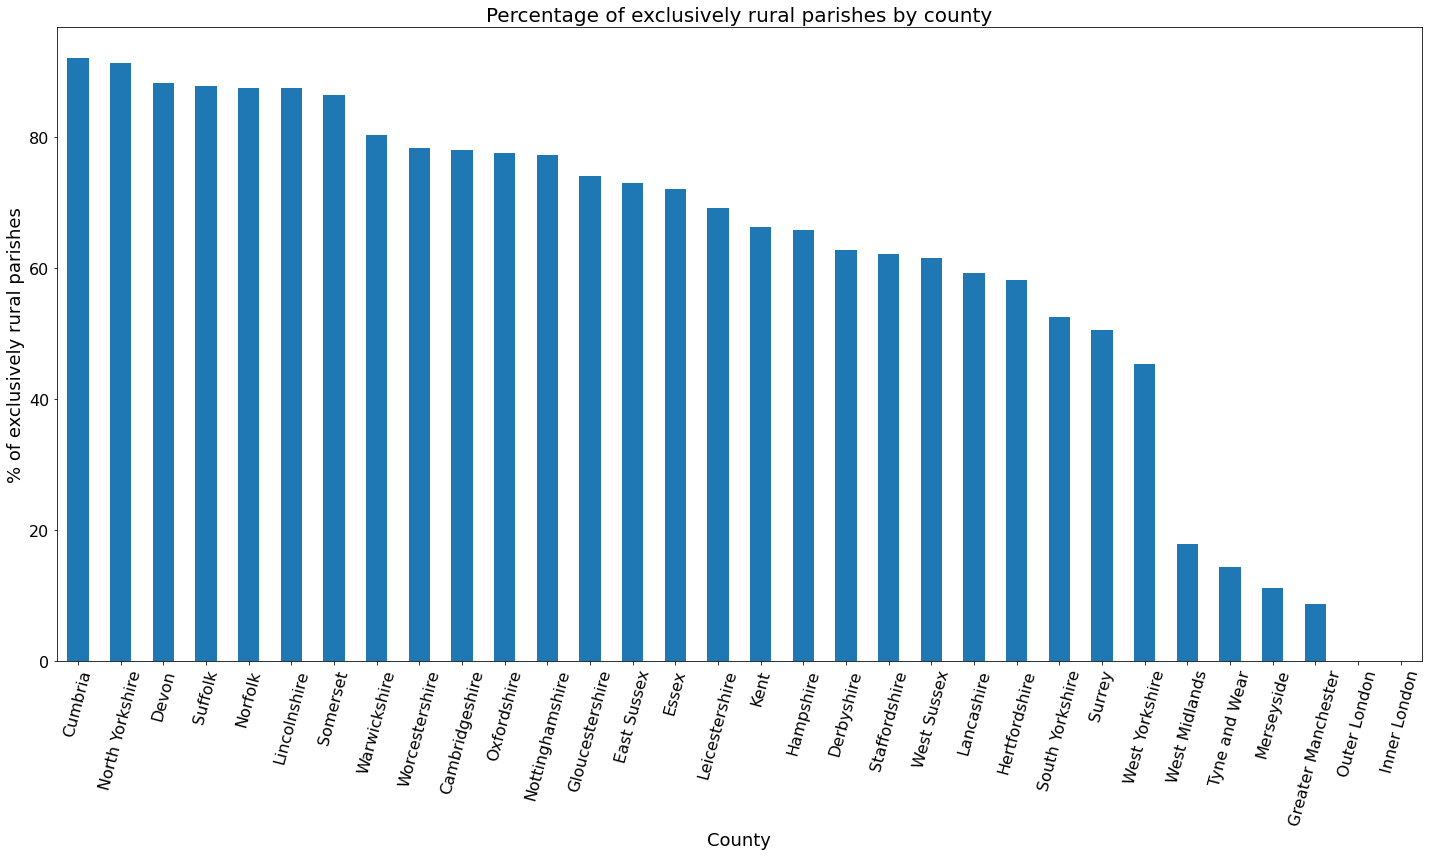

In [705]:
fig, ax = plt.subplots(figsize=(20,12))
loss_df.sort_values(by='pct_parishes', ascending=False).pct_parishes.plot(kind='bar', ax=ax)
plt.xlabel('County', fontsize=18)
plt.ylabel('% of exclusively rural parishes', fontsize=18)
plt.xticks(fontsize=16, rotation=75)
plt.yticks(fontsize=16)
plt.title('Percentage of exclusively rural parishes by county', fontsize=20)
plt.tight_layout()
plt.savefig('pct_exclusive_rural_parishes.png')
plt.show()

Henceforth, based on the above, let's exclude:

- Inner London
- Greater Manchester
- Merseyside
- Tyne and Wear
- West Midlands

from our rural analyses

### Overall Amenities

In [706]:
from collections import Counter
overall_list = []
for county, parishes in overall_dict.items():
    for parish, data in parishes.items():
        for am in data['amenities']:
            overall_list.append(am['amenity'])
            
overall_ams = pd.DataFrame(Counter(overall_list).most_common(), columns=['amenity', 'number'])
overall_ams.loc[:, 'pct_amenities'] = 100*overall_ams.number / overall_ams.number.sum()
overall_ams

,amenity,number,pct_amenities
0,parking,121827,19.770178
1,bench,60987,9.897017
2,post_box,51168,8.303582
3,parking_space,42145,6.839323
4,bicycle_parking,39505,6.410901
...,...,...,...
956,Day Centre,1,0.000162
957,laboratory,1,0.000162
958,convenience store,1,0.000162
959,arts_school,1,0.000162


In [707]:
non_rural_counties = [
    'Inner London',
    'Greater Manchester',
    'Merseyside',
    'Tyne and Wear',
    'West Midlands'
]
rural_list = []
for county, parishes in only_rural_dict.items():
    if county not in non_rural_counties:
        for parish, data in parishes.items():
            for am in data['amenities']:
                rural_list.append(am['amenity'])
            
rural_ams = pd.DataFrame(Counter(rural_list).most_common(), columns=['amenity', 'number'])
rural_ams.loc[:, 'pct_amenities'] = 100*rural_ams.number / rural_ams.number.sum()
rural_ams

,amenity,number,pct_amenities
0,parking,24701,21.283324
1,bench,14902,12.840132
2,post_box,14585,12.566992
3,place_of_worship,7700,6.634614
4,pub,6276,5.407641
...,...,...,...
341,Adwell Cop,1,0.000862
342,science_park,1,0.000862
343,convenience store,1,0.000862
344,composting,1,0.000862


In [708]:
overall_ams.head(20)

,amenity,number,pct_amenities
0,parking,121827,19.770178
1,bench,60987,9.897017
2,post_box,51168,8.303582
3,parking_space,42145,6.839323
4,bicycle_parking,39505,6.410901
5,waste_basket,29343,4.761804
6,pub,24918,4.043712
7,place_of_worship,23272,3.776598
8,fast_food,23164,3.759071
9,restaurant,20956,3.400756


In [709]:
merged_ams = overall_ams[['amenity', 'pct_amenities']].merge(
    rural_ams[['amenity', 'pct_amenities']],
    how='inner',
    on='amenity',
    suffixes=("_overall", "_rural")
)
merged_ams.head(20)

,amenity,pct_amenities_overall,pct_amenities_rural
0,parking,19.770178,21.283324
1,bench,9.897017,12.840132
2,post_box,8.303582,12.566992
3,parking_space,6.839323,3.377622
4,bicycle_parking,6.410901,1.016733
5,waste_basket,4.761804,3.112237
6,pub,4.043712,5.407641
7,place_of_worship,3.776598,6.634614
8,fast_food,3.759071,1.062400
9,restaurant,3.400756,1.394131


In [710]:
merged_ams.sort_values(by='pct_amenities_rural', ascending=False).head(10)

,amenity,pct_amenities_overall,pct_amenities_rural
0,parking,19.770178,21.283324
1,bench,9.897017,12.840132
2,post_box,8.303582,12.566992
7,place_of_worship,3.776598,6.634614
6,pub,4.043712,5.407641
13,grave_yard,1.295325,4.689896
3,parking_space,6.839323,3.377622
5,waste_basket,4.761804,3.112237
11,school,3.026698,2.842544
12,telephone,1.885865,2.663324


In [711]:
merged_ams.loc[:, 'rel_pct_more_rural'] = (merged_ams.pct_amenities_rural - merged_ams.pct_amenities_overall)/merged_ams.pct_amenities_overall
merged_ams.loc[:, 'abs_pct_more_rural'] = (merged_ams.pct_amenities_rural - merged_ams.pct_amenities_overall)
merged_ams.sort_values(by='rel_pct_more_rural').head(10)

,amenity,pct_amenities_overall,pct_amenities_rural,rel_pct_more_rural,abs_pct_more_rural
52,car_sharing,0.110675,0.002585,-0.976644,-0.108091
66,bureau_de_change,0.054851,0.001723,-0.968583,-0.053128
83,gambling,0.023368,0.000862,-0.963128,-0.022507
97,dojo,0.012496,0.000862,-0.931045,-0.011634
74,trolley_bay,0.034404,0.002585,-0.924865,-0.031819
101,bus_garage,0.011035,0.000862,-0.921918,-0.010173
67,loading_dock,0.054039,0.004308,-0.920277,-0.049731
41,motorcycle_parking,0.187597,0.015509,-0.917325,-0.172087
106,language_school,0.009250,0.000862,-0.906850,-0.008388
36,parking_entrance,0.240176,0.022403,-0.906724,-0.217773


In [712]:
merged_ams.sort_values(by='rel_pct_more_rural', ascending=False).head(10)

,amenity,pct_amenities_overall,pct_amenities_rural,rel_pct_more_rural,abs_pct_more_rural
147,enclosing,0.002434,0.012925,4.309552,0.010490
181,holiday_park,0.000811,0.004308,4.309552,0.003497
345,convenience store,0.000162,0.000862,4.309552,0.000699
263,refreshments,0.000162,0.000862,4.309552,0.000699
269,seed_library,0.000162,0.000862,4.309552,0.000699
268,playground,0.000162,0.000862,4.309552,0.000699
267,youth,0.000162,0.000862,4.309552,0.000699
266,ex_telephone,0.000162,0.000862,4.309552,0.000699
265,cider farm,0.000162,0.000862,4.309552,0.000699
262,church_yard,0.000162,0.000862,4.309552,0.000699


In [713]:
merged_ams.sort_values(by='abs_pct_more_rural', ascending=True).head(10)

,amenity,pct_amenities_overall,pct_amenities_rural,rel_pct_more_rural,abs_pct_more_rural
4,bicycle_parking,6.410901,1.016733,-0.841406,-5.394168
3,parking_space,6.839323,3.377622,-0.506147,-3.461701
8,fast_food,3.759071,1.062400,-0.717377,-2.696672
9,restaurant,3.400756,1.394131,-0.590053,-2.006625
5,waste_basket,4.761804,3.112237,-0.346416,-1.649567
10,cafe,3.284887,2.527185,-0.230663,-0.757702
15,atm,1.013768,0.301573,-0.702522,-0.712195
18,pharmacy,0.904228,0.330869,-0.634087,-0.573359
23,bank,0.646527,0.130969,-0.797427,-0.515558
25,bar,0.594434,0.169743,-0.714447,-0.424692


In [714]:
merged_ams.sort_values(by='abs_pct_more_rural', ascending=False).head(10)

,amenity,pct_amenities_overall,pct_amenities_rural,rel_pct_more_rural,abs_pct_more_rural
2,post_box,8.303582,12.566992,0.513442,4.263411
13,grave_yard,1.295325,4.689896,2.620633,3.394571
1,bench,9.897017,12.840132,0.297374,2.943115
7,place_of_worship,3.776598,6.634614,0.756770,2.858016
28,hunting_stand,0.451627,2.130831,3.718118,1.679204
0,parking,19.770178,21.283324,0.076537,1.513146
6,pub,4.043712,5.407641,0.337296,1.363929
12,telephone,1.885865,2.663324,0.412256,0.777459
16,community_centre,1.010522,1.778421,0.759903,0.767899
17,toilets,0.998351,1.622465,0.625144,0.624113


In [715]:
to_get = ['pub', 'place_of_worship', 'school']

## Building the data frame

In [716]:
only_rural_dict['North Yorkshire']['Great Ouseburn'].keys()

dict_keys(['population', 'size', 'region', 'classification', 'amenities'])

In [717]:
other

{'population': 263,
 'size': 3658800.46937825,
 'region': 'South East',
 'classification': [{'population': 263,
   'classy': 'Rural village',
   'imd_class': 26501.0}],
 'amenities': [{'name': 'Landscape Axle',
   'amenity': 'bench',
   'data_type': 'node',
   'lat': '51.5888515',
   'lon': '-1.2497956',
   'other_tags': {'amenity': 'bench',
    'artist_name': 'Tim Norris',
    'artwork_type': 'seating',
    'name': 'Landscape Axle',
    'sustrans_ref': '278',
    'tourism': 'artwork'}},
  {'name': 'N/A',
   'amenity': 'post_box',
   'data_type': 'node',
   'lat': '51.5866666',
   'lon': '-1.2605611',
   'other_tags': {'amenity': 'post_box',
    'operator': 'Royal Mail',
    'post_box:design': 'type_n',
    'post_box:type': 'lamp',
    'ref': 'OX11 1075'}},
  {'name': 'N/A',
   'amenity': 'bench',
   'data_type': 'node',
   'lat': '51.5880264',
   'lon': '-1.2477355',
   'other_tags': {'amenity': 'bench'}},
  {'name': 'N/A',
   'amenity': 'bench',
   'data_type': 'node',
   'lat': '51.

In [718]:
big_list = []
for county, data in only_rural_dict.items():
    for parish, other in data.items():
        population = other['population']
        region = other['region']
        parish_thing = dict((i, 0) for i in to_get)
        parish_thing['population'] = population
        parish_thing['name'] = parish
        parish_thing['area'] = other['size']
        parish_thing['county'] = county
        parish_thing['region'] = region
        for am in other['amenities']:
            am_type = am['amenity']
            if am_type in to_get:
                parish_thing[am_type] += 1
        imd_total = 0
        for bit in other['classification']:
            imd_total += bit['imd_class'] * bit['population']
        imd_total = imd_total / population
        parish_thing['weighted_imd'] = imd_total
        big_list.append(parish_thing)

In [719]:
big_list[0]

{'pub': 2,
 'place_of_worship': 2,
 'school': 1,
 'population': 1203,
 'name': 'Bradleys Both',
 'area': 7898753.90211326,
 'county': 'North Yorkshire',
 'region': 'Yorkshire and The Humber',
 'weighted_imd': 30238.0}

In [720]:
df = pd.DataFrame(big_list)

In [721]:
df.head()

,pub,place_of_worship,school,population,name,area,county,region,weighted_imd
0,2,2,1,1203,Bradleys Both,7.898754e+06,North Yorkshire,Yorkshire and The Humber,30238.0
1,2,1,1,1469,Cononley,6.695996e+06,North Yorkshire,Yorkshire and The Humber,23934.0
2,0,1,0,481,Farnhill,1.691419e+06,North Yorkshire,Yorkshire and The Humber,30238.0
3,1,2,1,222,Kildwick,3.710505e+06,North Yorkshire,Yorkshire and The Humber,30238.0
4,1,2,1,509,Lothersdale,1.084977e+07,North Yorkshire,Yorkshire and The Humber,23934.0


In [722]:
df.shape

(5066, 9)

In [723]:
df.sort_values(by='population', ascending=False).head()

,pub,place_of_worship,school,population,name,area,county,region,weighted_imd
2271,5,10,6,12162,Heathfield and Waldron,5.281596e+07,East Sussex,South East,24913.929781
3089,7,11,5,11192,Holbeach,1.007035e+08,Lincolnshire,East Midlands,14565.025643
3482,12,9,7,10866,Maryport,1.329315e+07,Cumbria,North West,8925.915976
1495,4,3,5,9629,Tiptree,9.576908e+06,Essex,East of England,22970.041853
3886,4,2,3,9403,Yaxley,1.333501e+07,Cambridgeshire,East of England,21554.123578


In [724]:
df.sort_values(by='population').head()

,pub,place_of_worship,school,population,name,area,county,region,weighted_imd
2645,0,1,0,100,Denston,4.854119e+06,Suffolk,East of England,18025.0
1254,0,1,0,101,East Quantoxhead,9.448572e+06,Somerset,South West,12279.0
1240,1,1,0,102,Monksilver,3.202055e+06,Somerset,South West,10163.0
217,1,0,0,102,Plompton,7.677769e+06,North Yorkshire,Yorkshire and The Humber,27348.0
3905,0,1,0,103,Shingay cum Wendy,7.270825e+06,Cambridgeshire,East of England,8852.0


### Population Distribution

In [725]:
sns.histplot

<function seaborn.distributions.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)>

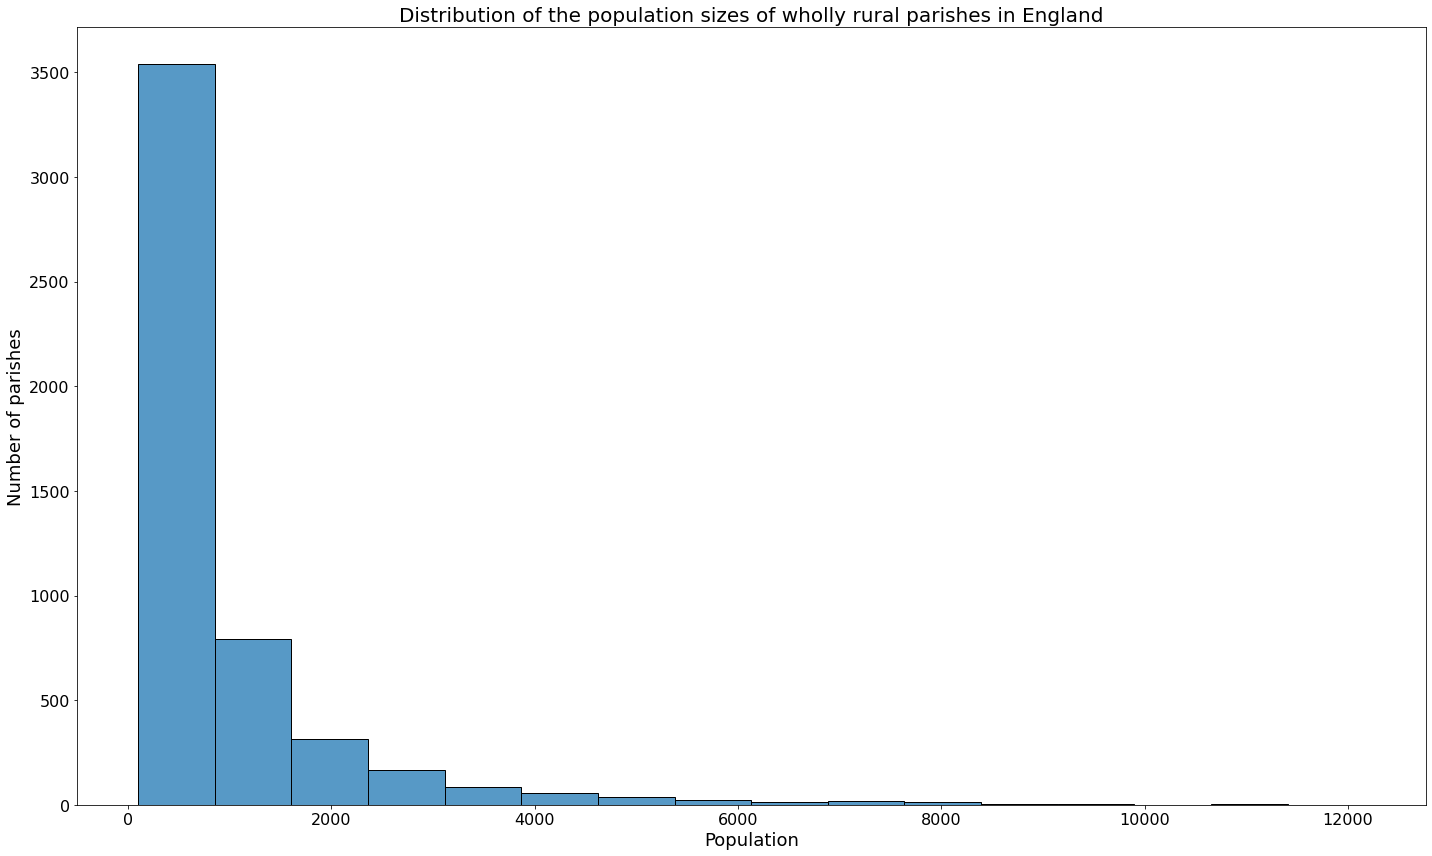

In [726]:
fig, ax = plt.subplots(figsize=(20,12))
sns.histplot(df.population.values, bins=16)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Number of parishes', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Distribution of the population sizes of wholly rural parishes in England', fontsize=20)
plt.tight_layout()
plt.savefig('pop_distribution_rural_parishes.png')
plt.show()

## Average plots

In [727]:
df.loc[:, 'population_grouped'] = df.population.apply(
lambda x: 100*np.round(x/100) if x <= 1000 else 250*np.round(x/250) if x <= 2000 else np.round(x/1000)*1000 if x <= 5000 else np.round(x/5000)*5000
    
)


In [728]:
df.groupby(['population_grouped']).agg('mean')[to_get]

,pub,place_of_worship,school
population_grouped,,,
100.0,0.272727,1.006494,0.064935
200.0,0.475638,1.140371,0.104408
300.0,0.672365,1.269231,0.207977
400.0,0.862333,1.353728,0.369025
500.0,1.035088,1.375940,0.458647
600.0,1.105802,1.440273,0.576792
700.0,1.241379,1.336207,0.771552
800.0,1.390476,1.447619,0.923810
900.0,1.280702,1.450292,0.918129


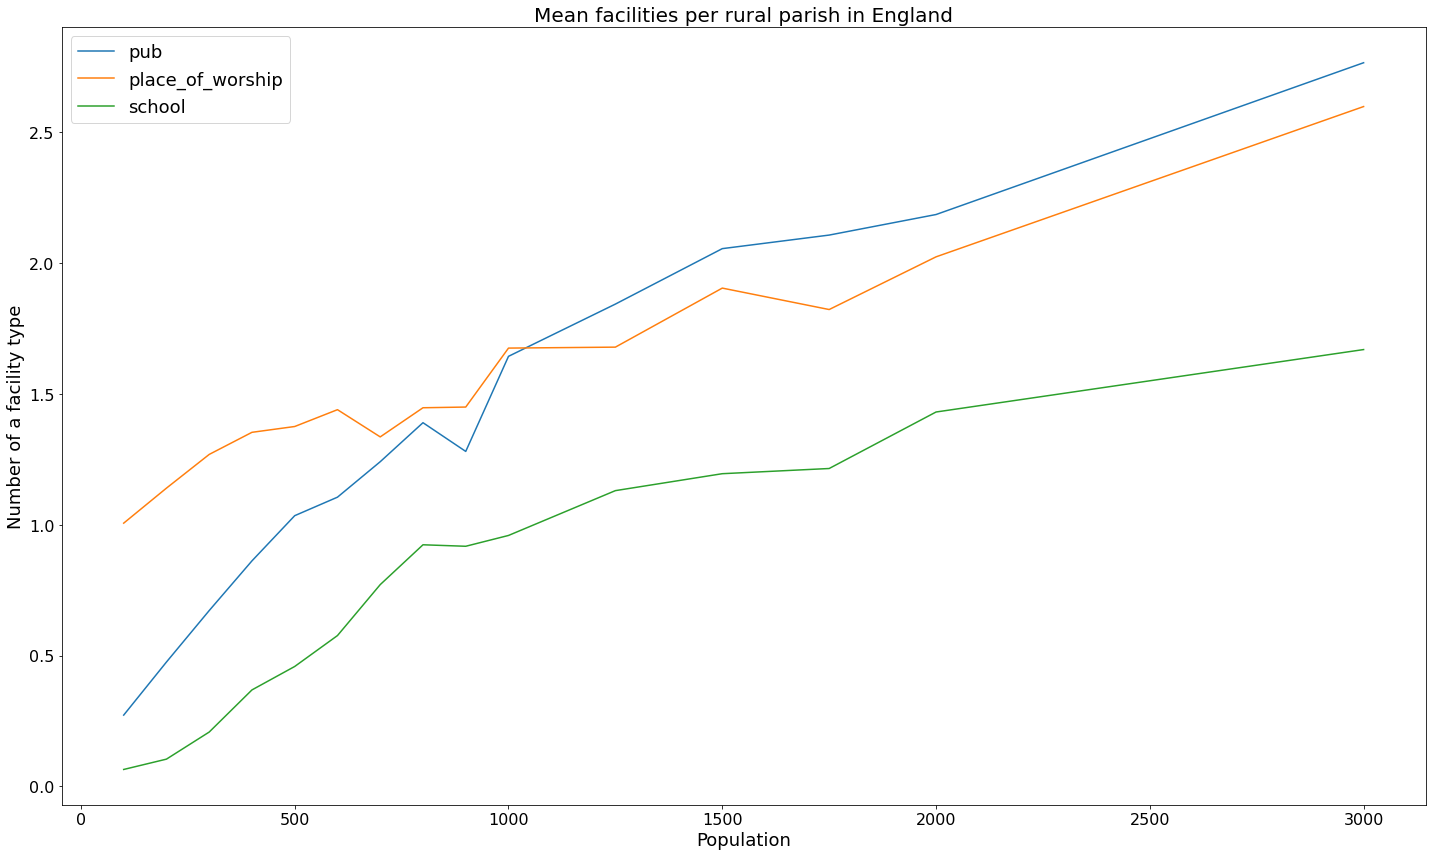

In [729]:
fig, ax = plt.subplots(figsize=(20,12))
df[df.population_grouped < 4000].groupby(['population_grouped']).agg('mean')[to_get].plot(ax=ax)
plt.xlabel('Population', fontsize=18)
plt.ylabel('Number of a facility type', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.title('Mean facilities per rural parish in England', fontsize=20)
plt.tight_layout()
plt.savefig('avg_facilities_per_rural_parish_small.png')
plt.show()

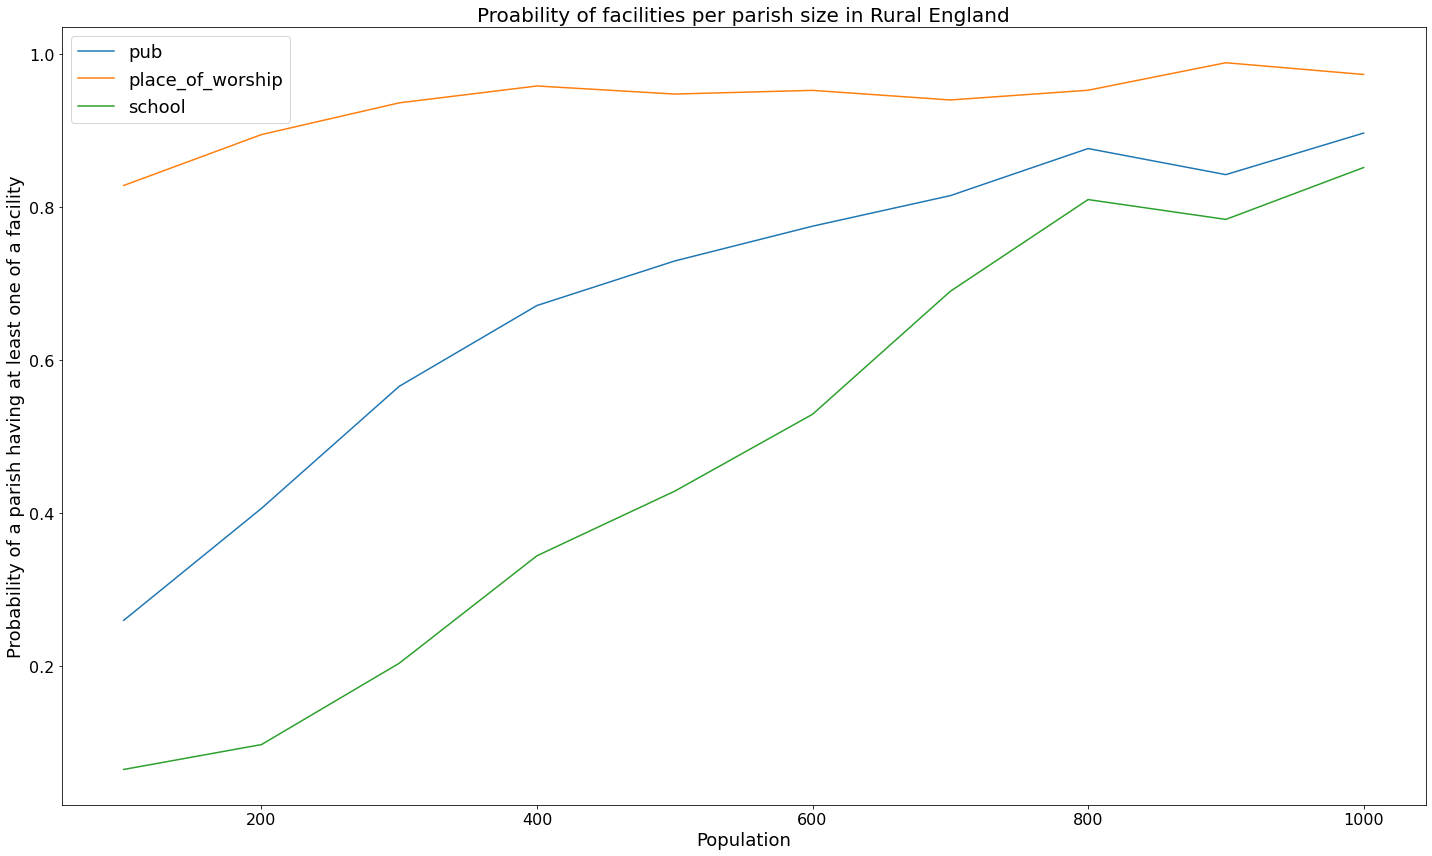

In [730]:
fig, ax = plt.subplots(figsize=(20,12))
small_parishes = df[df.population_grouped <= 1000]
for item in to_get:
    copy = small_parishes.copy()
    copy.loc[:, 'masked_item'] = copy[[item]] > 0
    copy.groupby(['population_grouped']).masked_item.agg('mean').plot(ax=ax, label=item)
plt.xlabel('Population', fontsize=18)
plt.ylabel('Probability of a parish having at least one of a facility', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.title('Proability of facilities per parish size in Rural England', fontsize=20)
plt.tight_layout()
plt.savefig('prob_facilities_per_parish.png')
plt.show()

## By Region

In [731]:
region_sizes = df.groupby(['region']).size().reset_index()
region_sizes.columns = ['region', 'num_wholly_rural_parishes']
rural_regions = region_sizes[region_sizes.num_wholly_rural_parishes >= 100].region.values

In [732]:
real_rural_regions = df[df.region.isin(rural_regions)]

In [797]:
real_rural_regions[real_rural_regions.population <= 1000].groupby(['region']).size().sort_values()

region
North West                  261
West Midlands               305
Yorkshire and The Humber    468
South East                  525
South West                  616
East Midlands               645
East of England             957
dtype: int64

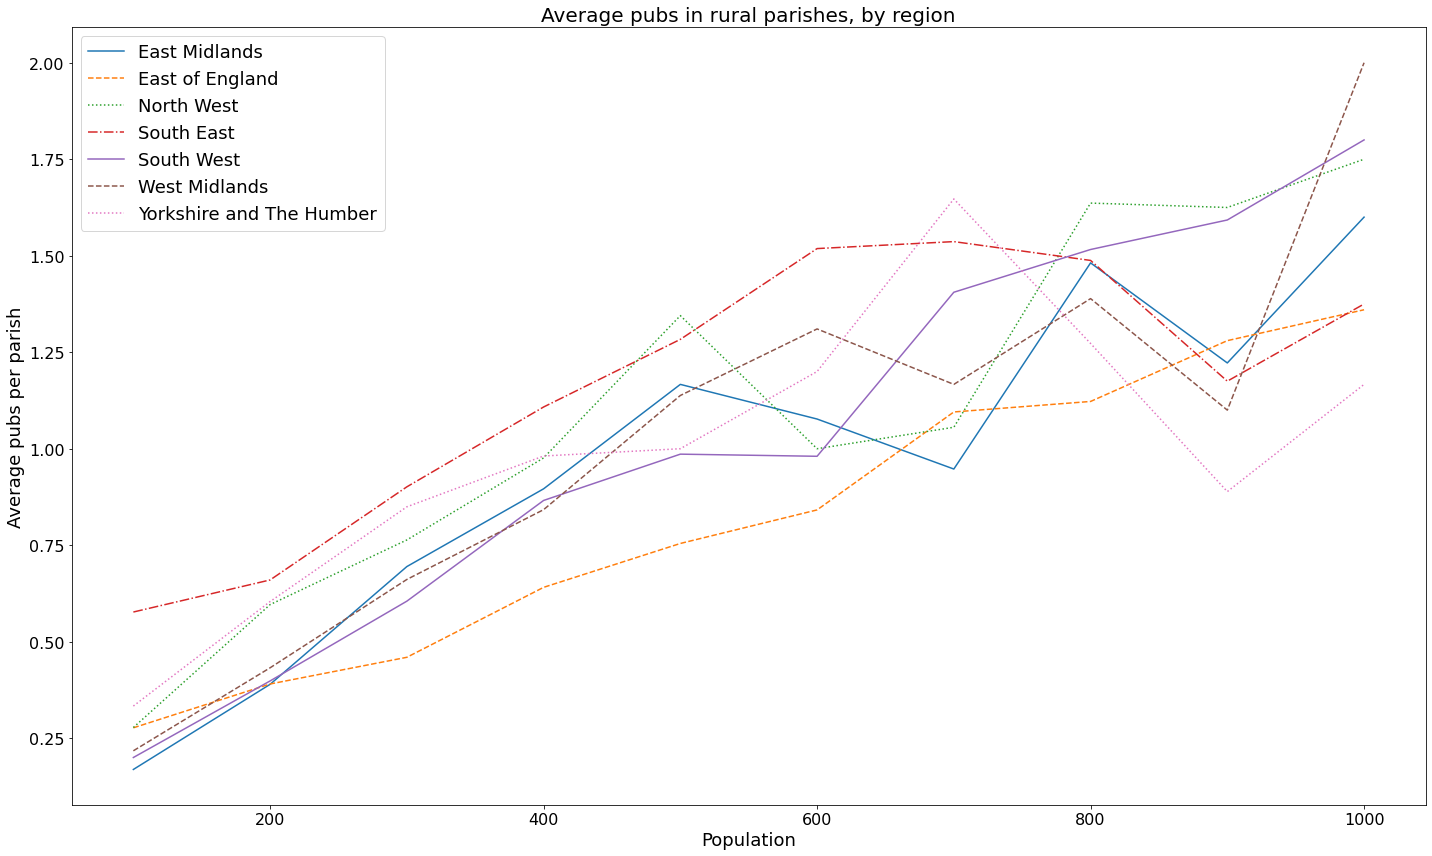

In [734]:
ls = ['-', '--', ':', '-.']
i = 0
fig, ax = plt.subplots(figsize=(20,12))
pop_range = np.arange(100,2500)
for region, frame in real_rural_regions[(real_rural_regions.population <= 1000)].groupby(['region']):
    frame.groupby(['population_grouped']).pub.agg('mean').plot(ax=ax, label=region, ls=ls[i % len(ls)])
    i += 1

plt.legend(fontsize=18)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Average pubs per parish', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Average pubs in rural parishes, by region', fontsize=20)
plt.tight_layout()
plt.savefig('pubs_per_parish_by_region.png')
plt.show()

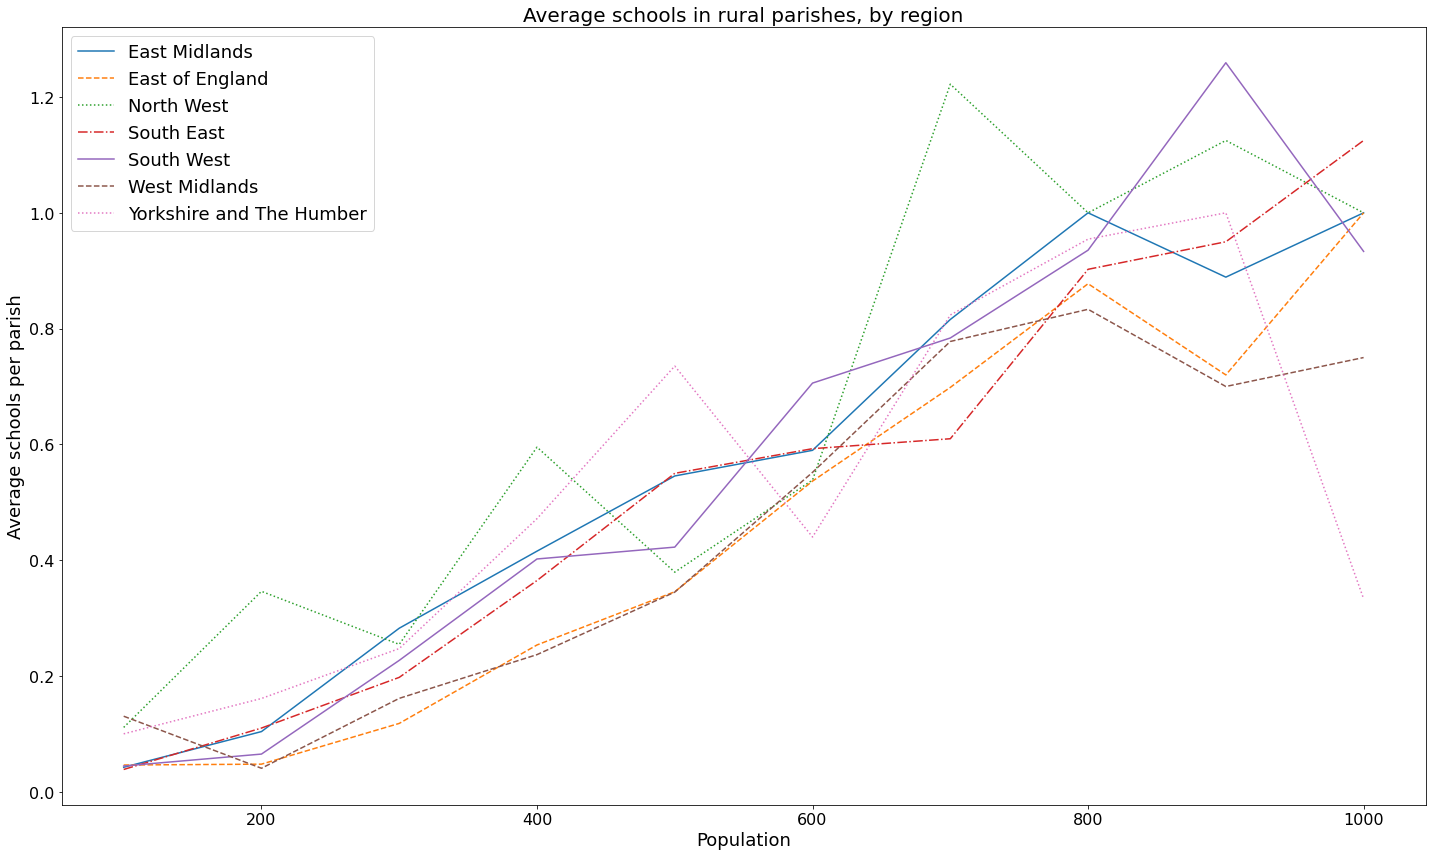

In [793]:
ls = ['-', '--', ':', '-.']
i = 0
fig, ax = plt.subplots(figsize=(20,12))
pop_range = np.arange(100,2500)
for region, frame in real_rural_regions[(real_rural_regions.population <= 1000)].groupby(['region']):
    frame.groupby(['population_grouped']).school.agg('mean').plot(ax=ax, label=region, ls=ls[i % len(ls)])
    i += 1

plt.legend(fontsize=18)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Average schools per parish', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Average schools in rural parishes, by region', fontsize=20)
plt.tight_layout()
plt.savefig('schools_per_parish_by_region.png')
plt.show()

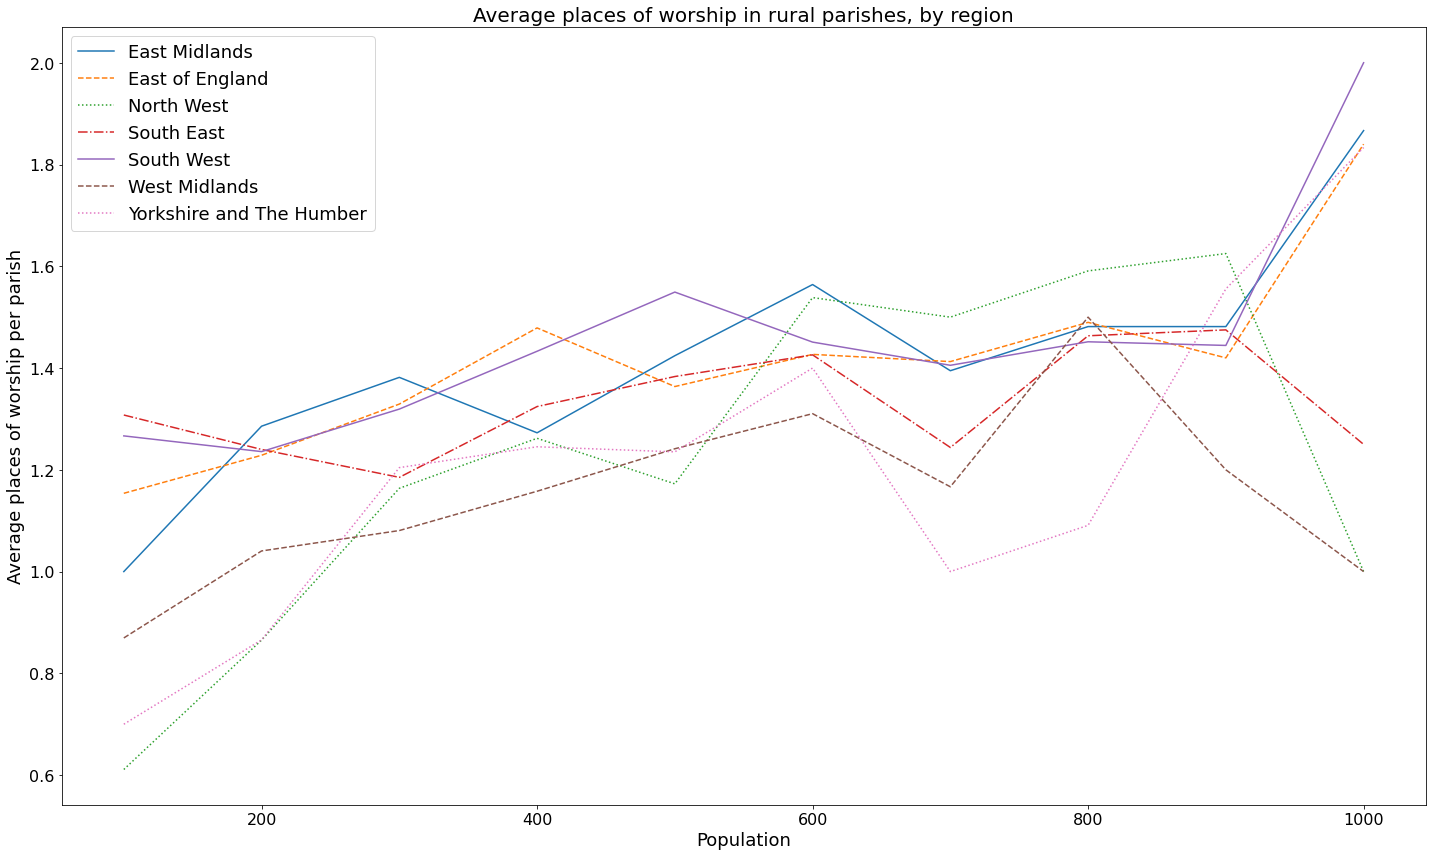

In [794]:
ls = ['-', '--', ':', '-.']
i = 0
fig, ax = plt.subplots(figsize=(20,12))
pop_range = np.arange(100,2500)
for region, frame in real_rural_regions[(real_rural_regions.population <= 1000)].groupby(['region']):
    frame.groupby(['population_grouped']).place_of_worship.agg('mean').plot(ax=ax, label=region, ls=ls[i % len(ls)])
    i += 1

plt.legend(fontsize=18)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Average places of worship per parish', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Average places of worship in rural parishes, by region', fontsize=20)
plt.tight_layout()
plt.savefig('worship_per_parish_by_region.png')
plt.show()

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_22568/3617683187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_rural_regions.loc[:, 'school_bool'] = real_rural_regions.school > 0
/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_22568/3617683187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_rural_regions.loc[:, 'school_bool'] = real_rural_regions.school_bool.astype(int)
/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_22568/3617683187.py:3: SettingWithCopy

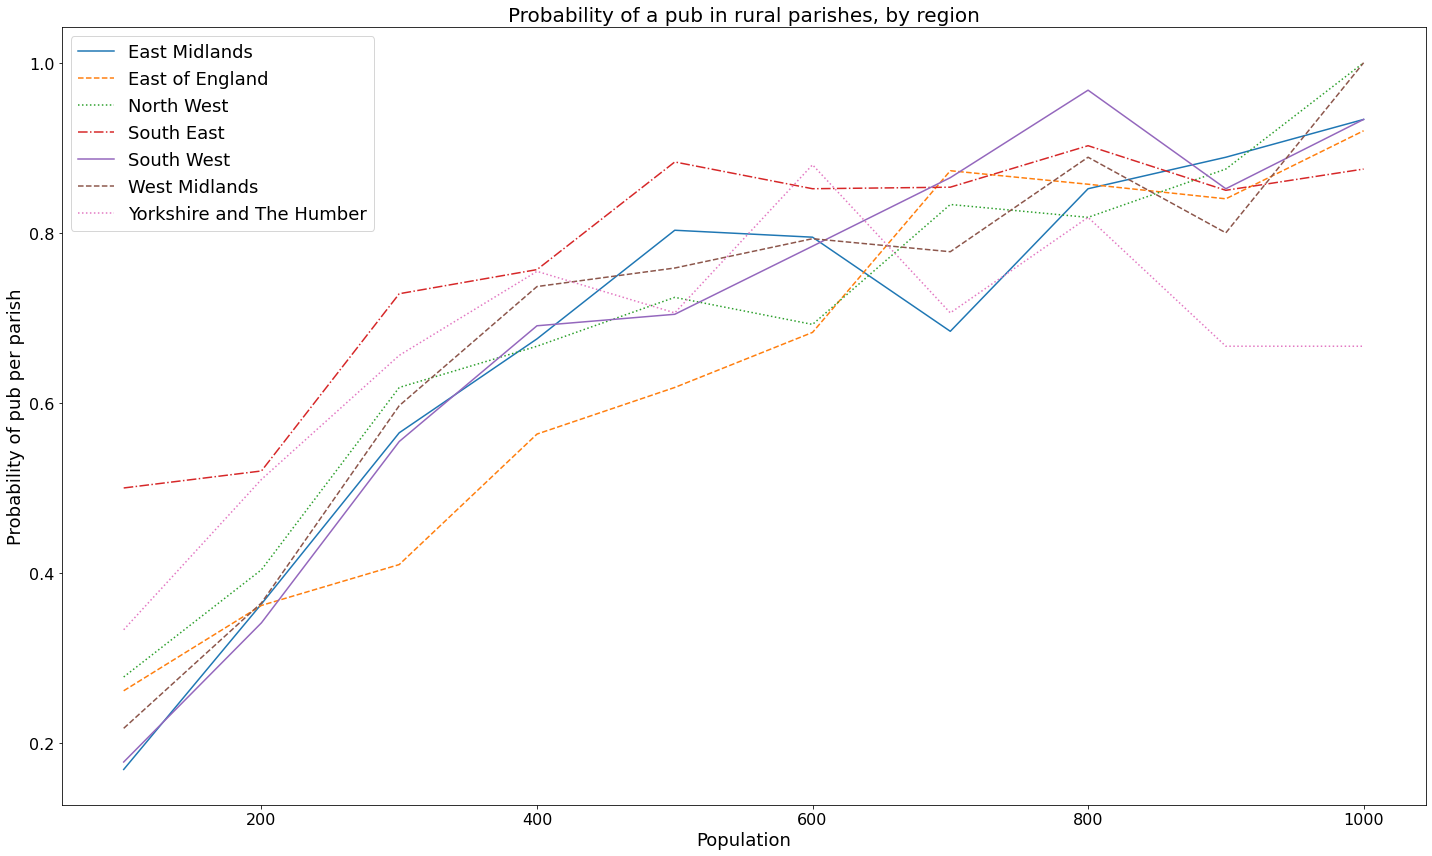

In [796]:
real_rural_regions.loc[:, 'school_bool'] = real_rural_regions.school > 0
real_rural_regions.loc[:, 'school_bool'] = real_rural_regions.school_bool.astype(int)
real_rural_regions.loc[:, 'pub_bool'] = real_rural_regions.pub > 0
real_rural_regions.loc[:, 'pub_bool'] = real_rural_regions.pub_bool.astype(int)
real_rural_regions.loc[:, 'worship_bool'] = real_rural_regions.place_of_worship > 0
real_rural_regions.loc[:, 'worship_bool'] = real_rural_regions.worship_bool.astype(int)

ls = ['-', '--', ':', '-.']
i = 0
fig, ax = plt.subplots(figsize=(20,12))
pop_range = np.arange(100,2500)
for region, frame in real_rural_regions[(real_rural_regions.population <= 1000)].groupby(['region']):
    frame.groupby(['population_grouped']).pub_bool.agg('mean').plot(ax=ax, label=region, ls=ls[i % len(ls)])
    i += 1

plt.legend(fontsize=18)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Probability of pub per parish', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Probability of a pub in rural parishes, by region', fontsize=20)
plt.tight_layout()
plt.savefig('prob_pubs_per_parish_by_region.png')
plt.show()

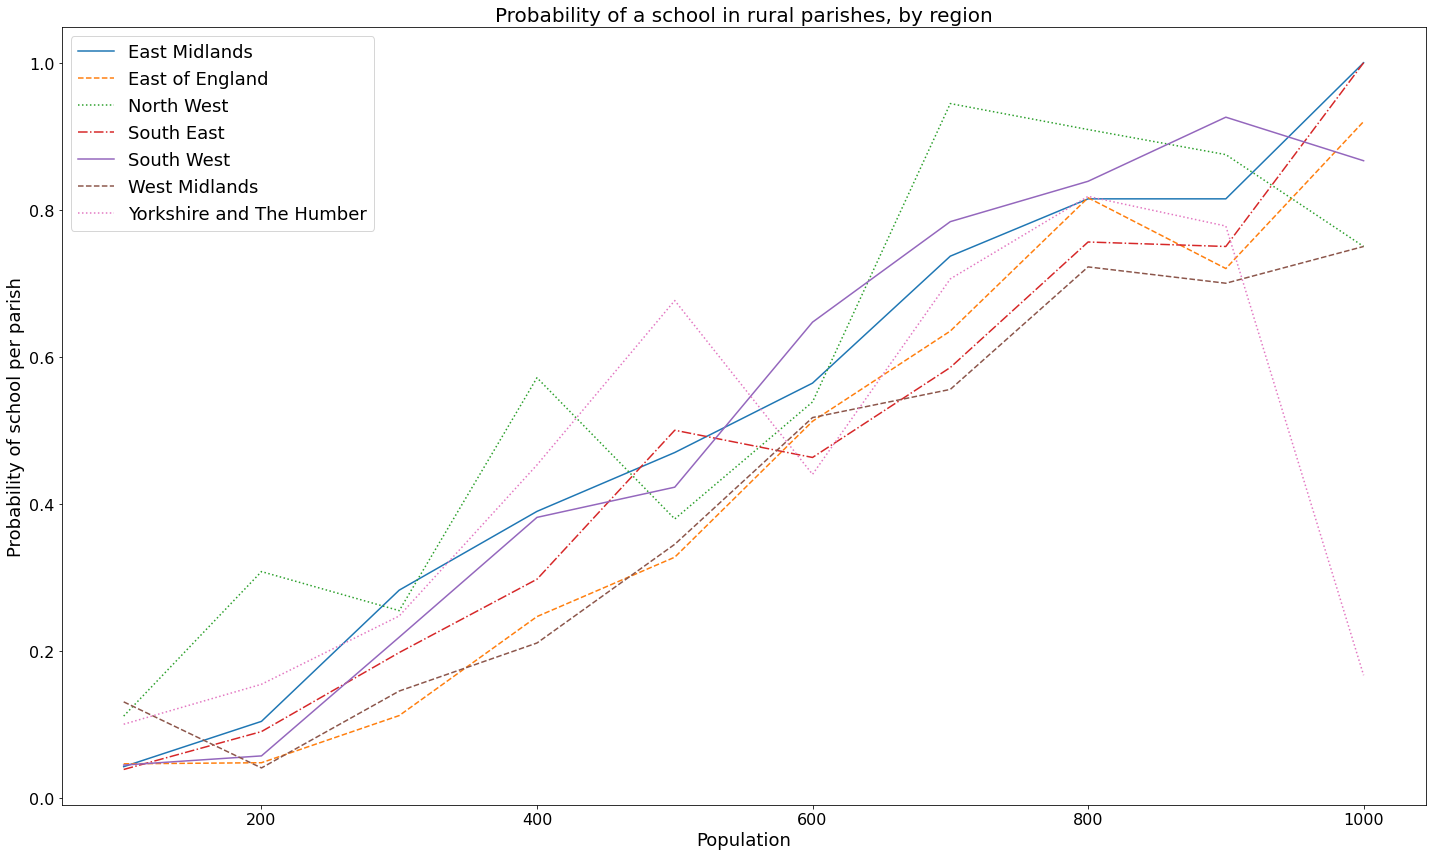

In [798]:
ls = ['-', '--', ':', '-.']
i = 0
fig, ax = plt.subplots(figsize=(20,12))
pop_range = np.arange(100,2500)
for region, frame in real_rural_regions[(real_rural_regions.population <= 1000)].groupby(['region']):
    frame.groupby(['population_grouped']).school_bool.agg('mean').plot(ax=ax, label=region, ls=ls[i % len(ls)])
    i += 1

plt.legend(fontsize=18)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Probability of school per parish', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Probability of a school in rural parishes, by region', fontsize=20)
plt.tight_layout()
plt.savefig('prob_schools_per_parish_by_region.png')
plt.show()

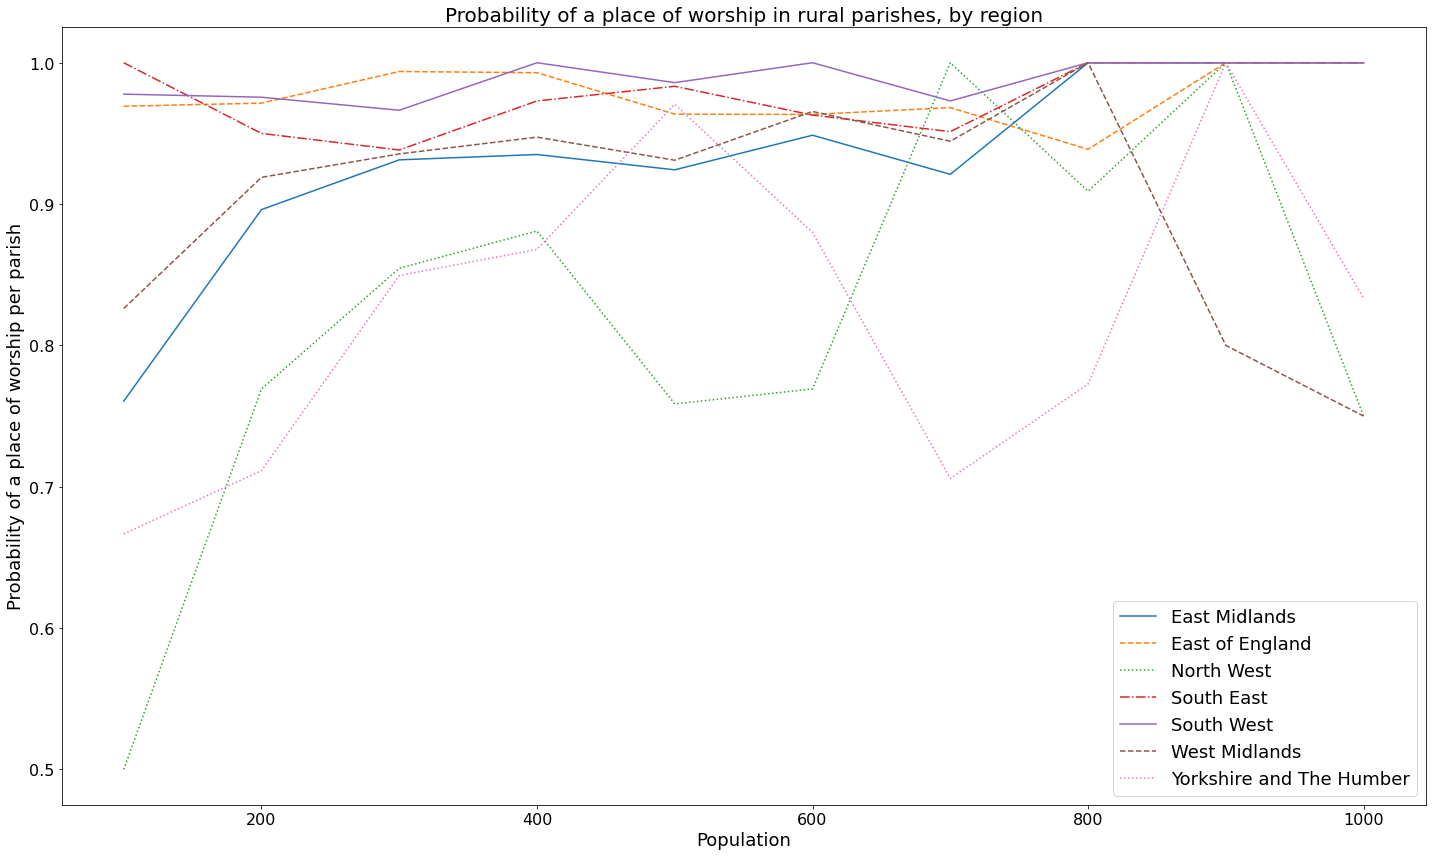

In [799]:
ls = ['-', '--', ':', '-.']
i = 0
fig, ax = plt.subplots(figsize=(20,12))
pop_range = np.arange(100,2500)
for region, frame in real_rural_regions[(real_rural_regions.population <= 1000)].groupby(['region']):
    frame.groupby(['population_grouped']).worship_bool.agg('mean').plot(ax=ax, label=region, ls=ls[i % len(ls)])
    i += 1

plt.legend(fontsize=18)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Probability of a place of worship per parish', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Probability of a place of worship in rural parishes, by region', fontsize=20)
plt.tight_layout()
plt.savefig('prob_worship_per_parish_by_region.png')
plt.show()

In [735]:
real_rural_regions.head()

,pub,place_of_worship,school,population,name,area,county,region,weighted_imd,population_grouped
0,2,2,1,1203,Bradleys Both,7.898754e+06,North Yorkshire,Yorkshire and The Humber,30238.0,1250.0
1,2,1,1,1469,Cononley,6.695996e+06,North Yorkshire,Yorkshire and The Humber,23934.0,1500.0
2,0,1,0,481,Farnhill,1.691419e+06,North Yorkshire,Yorkshire and The Humber,30238.0,500.0
3,1,2,1,222,Kildwick,3.710505e+06,North Yorkshire,Yorkshire and The Humber,30238.0,200.0
4,1,2,1,509,Lothersdale,1.084977e+07,North Yorkshire,Yorkshire and The Humber,23934.0,500.0


In [736]:
real_rural_regions.groupby(['region']).weighted_imd.agg('mean').sort_values()

region
South West                  17729.923751
East of England             18569.391525
East Midlands               18918.214492
North West                  19171.815449
Yorkshire and The Humber    20286.359220
West Midlands               20454.982437
South East                  20607.924602
Name: weighted_imd, dtype: float64

In [737]:
real_rural_regions.groupby(['region']).weighted_imd.describe().sort_values(by='50%')

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
South West,798.0,17729.923751,4780.878737,7803.00000,14304.0,17672.0,20786.50,31075.00000
East of England,1273.0,18569.391525,5411.473517,4162.00000,14319.0,18196.0,22412.00,32828.00000
North West,366.0,19171.815449,5410.149342,6922.19339,15110.0,18586.0,22994.00,32308.00000
East Midlands,814.0,18918.214492,6785.246590,1829.00000,13291.0,19557.0,24248.00,32826.00000
West Midlands,418.0,20454.982437,4835.000483,4468.00000,16846.0,20179.5,24119.00,31784.00000
Yorkshire and The Humber,577.0,20286.359220,5174.760970,542.00000,17073.0,20246.0,24204.00,32789.86917
South East,818.0,20607.924602,5526.054379,322.00000,17181.5,20782.5,24591.25,32621.00000


In [738]:
real_rural_regions.corr()

,pub,place_of_worship,school,population,area,weighted_imd,population_grouped
pub,1.000000,0.517285,0.553229,0.632702,0.320267,0.125904,0.630086
place_of_worship,0.517285,1.000000,0.455697,0.542336,0.336348,0.024518,0.530439
school,0.553229,0.455697,1.000000,0.681411,0.270685,0.152298,0.674830
population,0.632702,0.542336,0.681411,1.000000,0.230217,0.173799,0.983544
area,0.320267,0.336348,0.270685,0.230217,1.000000,-0.120839,0.230621
weighted_imd,0.125904,0.024518,0.152298,0.173799,-0.120839,1.000000,0.171583
population_grouped,0.630086,0.530439,0.674830,0.983544,0.230621,0.171583,1.000000


In [739]:
real_rural_regions.loc[:, 'schools_per_person'] = real_rural_regions.school / real_rural_regions.population
real_rural_regions.loc[:, 'pubs_per_person'] = real_rural_regions.pub / real_rural_regions.population
real_rural_regions.loc[:, 'worship_per_person'] = real_rural_regions.place_of_worship / real_rural_regions.population

real_rural_regions.corr()

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_22568/560064001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_rural_regions.loc[:, 'schools_per_person'] = real_rural_regions.school / real_rural_regions.population
/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_22568/560064001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_rural_regions.loc[:, 'pubs_per_person'] = real_rural_regions.pub / real_rural_regions.population
/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T

,pub,place_of_worship,school,population,area,weighted_imd,population_grouped,schools_per_person,pubs_per_person,worship_per_person
pub,1.000000,0.517285,0.553229,0.632702,0.320267,0.125904,0.630086,0.049398,0.343735,-0.285879
place_of_worship,0.517285,1.000000,0.455697,0.542336,0.336348,0.024518,0.530439,0.025094,-0.027311,0.198022
school,0.553229,0.455697,1.000000,0.681411,0.270685,0.152298,0.674830,0.481306,-0.093245,-0.354201
population,0.632702,0.542336,0.681411,1.000000,0.230217,0.173799,0.983544,-0.029601,-0.175774,-0.403517
area,0.320267,0.336348,0.270685,0.230217,1.000000,-0.120839,0.230621,0.089091,0.093567,-0.069824
weighted_imd,0.125904,0.024518,0.152298,0.173799,-0.120839,1.000000,0.171583,0.033927,-0.018518,-0.184031
population_grouped,0.630086,0.530439,0.674830,0.983544,0.230621,0.171583,1.000000,-0.028041,-0.174866,-0.403634
schools_per_person,0.049398,0.025094,0.481306,-0.029601,0.089091,0.033927,-0.028041,1.000000,0.066611,-0.050879
pubs_per_person,0.343735,-0.027311,-0.093245,-0.175774,0.093567,-0.018518,-0.174866,0.066611,1.000000,0.141434
worship_per_person,-0.285879,0.198022,-0.354201,-0.403517,-0.069824,-0.184031,-0.403634,-0.050879,0.141434,1.000000


## Pub model

In [740]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [741]:
to_keep = ['pub', 'school', 'place_of_worship', 'weighted_imd', 'area', 'region', 'population', 'name']
predictor_frame = real_rural_regions[(to_keep)]
predictor_frame.head()

,pub,school,place_of_worship,weighted_imd,area,region,population,name
0,2,1,2,30238.0,7.898754e+06,Yorkshire and The Humber,1203,Bradleys Both
1,2,1,1,23934.0,6.695996e+06,Yorkshire and The Humber,1469,Cononley
2,0,0,1,30238.0,1.691419e+06,Yorkshire and The Humber,481,Farnhill
3,1,1,2,30238.0,3.710505e+06,Yorkshire and The Humber,222,Kildwick
4,1,1,2,23934.0,1.084977e+07,Yorkshire and The Humber,509,Lothersdale


In [742]:
form_1 = 'pub ~ population + weighted_imd + area'
fit_1 = smf.ols(formula=form_1, data=predictor_frame).fit()
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pub   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     1297.
Date:                Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:26:36   Log-Likelihood:                -7751.6
No. Observations:                5064   AIC:                         1.551e+04
Df Residuals:                    5060   BIC:                         1.554e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0070      0.062     -0.114      0.909      -0.128       0.114
population       0.0007   1.41e-05     52.220      0.000       0.001       0.001
weighted_imd  1.284e-05   2.89e-06      4.444      0.000    7.18e-06    1.85e-05
area          2.881e-08   1.65e-09     17.481      0.000    2.56e-08     3.2e-08
==============================================================================
Omnibus:                     3291.685   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           144524.055
Skew:                           2.510   Prob(JB):                         0.00
Kurtosis:                      28.686   Cond. No.                     6.04e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.04e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

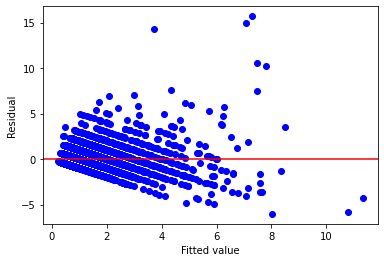

In [743]:
def make_fittedvalues_resid_plot(fit):
    plt.figure()
    plt.scatter(fit.fittedvalues, fit.resid, color='b')
    plt.axhline(y=0, color='r')
    plt.xlabel("Fitted value")
    plt.ylabel("Residual")
    return

make_fittedvalues_resid_plot(fit_1)
plt.show()

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_22568/197459724.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(


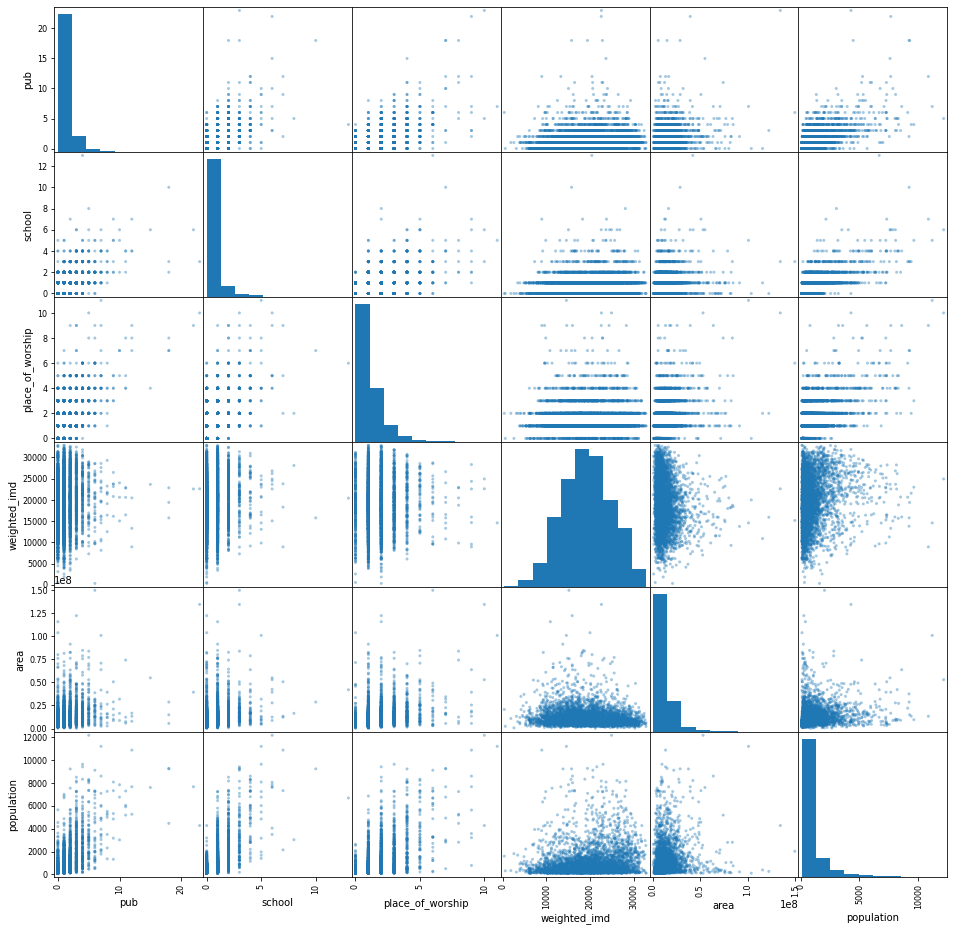

In [744]:
fig, ax = plt.subplots(figsize=(16,16))
pd.plotting.scatter_matrix(
    predictor_frame,
    alpha=0.4,
    ax=ax
)
plt.show()

In [745]:
smf.poisson

<bound method Model.from_formula of <class 'statsmodels.discrete.discrete_model.Poisson'>>

In [746]:
predictor_frame['ln_area'] = np.log(predictor_frame.area)
predictor_frame['ln_population'] = np.log(predictor_frame.population)


form_2 = 'pub ~ ln_population + weighted_imd + ln_area'
fit_2 = smf.poisson(formula=form_2, data=predictor_frame).fit()
fit_2.summary()

         Current function value: 1.251705
         Iterations: 35


/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_22568/3324907359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor_frame['ln_area'] = np.log(predictor_frame.area)
/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_22568/3324907359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor_frame['ln_population'] = np.log(predictor_frame.population)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization fai

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                    pub   No. Observations:                 5064
Model:                        Poisson   Df Residuals:                     5060
Method:                           MLE   Df Model:                            3
Date:                Wed, 11 Jan 2023   Pseudo R-squ.:                  0.1940
Time:                        17:26:38   Log-Likelihood:                -6338.6
converged:                      False   LL-Null:                       -7864.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -7.7277      0.316    -24.470      0.000      -8.347      -7.109
ln_population     0.6138      0.013     45.937      0.000       0.588       0.640
weighted_imd   5.058e-06   2.31e-06      2.186      0.029    5.23e-07    9.59e-06
ln_area           0.2336      0.020     11.664      0.000       0.194       0.273
=================================================================================
"""

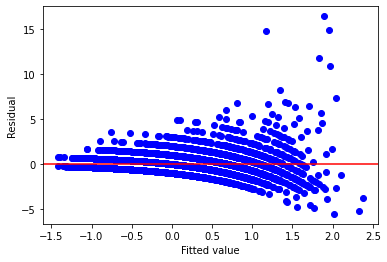

In [747]:
make_fittedvalues_resid_plot(fit_2)
plt.show()

## Logistic prediction

In [748]:
predictor_frame.loc[:, 'pub_bool'] = predictor_frame.pub > 0
predictor_frame.pub_bool = predictor_frame.pub_bool.astype(int)
predictor_frame.head()

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_22568/1123696051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor_frame.loc[:, 'pub_bool'] = predictor_frame.pub > 0
/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_22568/1123696051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor_frame.pub_bool = predictor_frame.pub_bool.astype(int)


,pub,school,place_of_worship,weighted_imd,area,region,population,name,ln_area,ln_population,pub_bool
0,2,1,2,30238.0,7.898754e+06,Yorkshire and The Humber,1203,Bradleys Both,15.882216,7.092574,1
1,2,1,1,23934.0,6.695996e+06,Yorkshire and The Humber,1469,Cononley,15.717020,7.292337,1
2,0,0,1,30238.0,1.691419e+06,Yorkshire and The Humber,481,Farnhill,14.341078,6.175867,0
3,1,1,2,30238.0,3.710505e+06,Yorkshire and The Humber,222,Kildwick,15.126678,5.402677,1
4,1,1,2,23934.0,1.084977e+07,Yorkshire and The Humber,509,Lothersdale,16.199655,6.232448,1


In [749]:
log_reg = smf.logit("pub_bool ~ weighted_imd + ln_population + ln_area", data=predictor_frame).fit_regularized()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5019647901033257
            Iterations: 25
            Function evaluations: 34
            Gradient evaluations: 25


/opt/homebrew/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/homebrew/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [750]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               pub_bool   No. Observations:                 5064
Model:                          Logit   Df Residuals:                     5060
Method:                           MLE   Df Model:                            3
Date:                Wed, 11 Jan 2023   Pseudo R-squ.:                  0.1929
Time:                        17:26:38   Log-Likelihood:                -2541.9
converged:                       True   LL-Null:                       -3149.5
Covariance Type:            nonrobust   LLR p-value:                3.865e-263
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -13.9280      0.953    -14.622      0.000     -15.795     -12.061
weighted_imd   3.396e-05   6.54e-06      5.190      0.000    2.11e-05    4.68e-05
ln_population     1.2833      0.052     24.851      0.000       1.182       1.385
ln_area           0.3916      0.059      6.615      0.000       0.276       0.508
=================================================================================
"""

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_22568/1778008168.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(


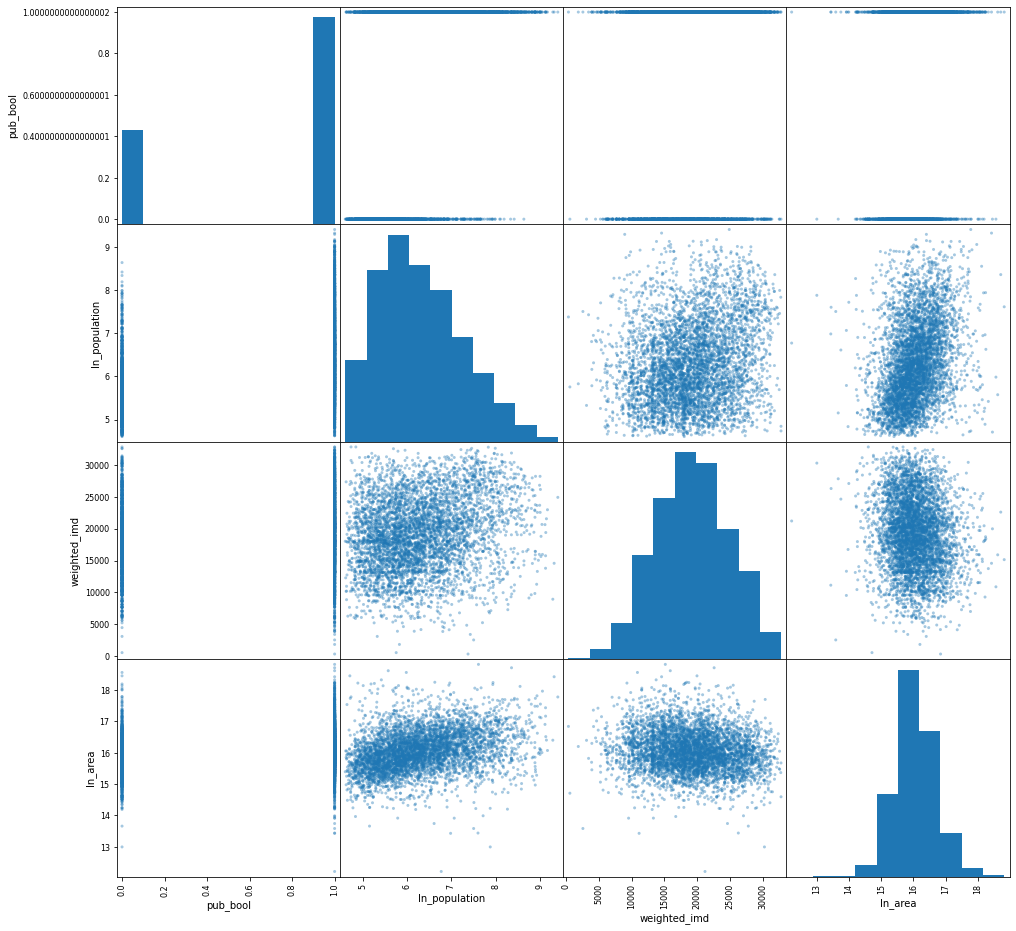

In [751]:
fig, ax = plt.subplots(figsize=(16,16))
pd.plotting.scatter_matrix(
    predictor_frame[['pub_bool', 'ln_population', 'weighted_imd', 'ln_area']],
    alpha=0.4, ax=ax
)
plt.show()

In [752]:
predictor_frame.head()

,pub,school,place_of_worship,weighted_imd,area,region,population,name,ln_area,ln_population,pub_bool
0,2,1,2,30238.0,7.898754e+06,Yorkshire and The Humber,1203,Bradleys Both,15.882216,7.092574,1
1,2,1,1,23934.0,6.695996e+06,Yorkshire and The Humber,1469,Cononley,15.717020,7.292337,1
2,0,0,1,30238.0,1.691419e+06,Yorkshire and The Humber,481,Farnhill,14.341078,6.175867,0
3,1,1,2,30238.0,3.710505e+06,Yorkshire and The Humber,222,Kildwick,15.126678,5.402677,1
4,1,1,2,23934.0,1.084977e+07,Yorkshire and The Humber,509,Lothersdale,16.199655,6.232448,1


In [753]:
predictor_frame.loc[:, 'school_bool'] = predictor_frame.school > 0
predictor_frame.loc[:, 'school_bool'] = predictor_frame.school_bool.astype(int)
predictor_frame.loc[:, 'worship_bool'] = predictor_frame.place_of_worship > 0
predictor_frame.loc[:, 'worship_bool'] = predictor_frame.worship_bool.astype(int)

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_22568/3708438963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor_frame.loc[:, 'school_bool'] = predictor_frame.school > 0
/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_22568/3708438963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor_frame.loc[:, 'school_bool'] = predictor_frame.school_bool.astype(int)


In [754]:
wide_frame = pd.concat([predictor_frame,pd.get_dummies(predictor_frame.region)], axis=1)
wide_frame.head()

,pub,school,place_of_worship,weighted_imd,area,region,population,name,ln_area,ln_population,pub_bool,school_bool,worship_bool,East Midlands,East of England,North West,South East,South West,West Midlands,Yorkshire and The Humber
0,2,1,2,30238.0,7.898754e+06,Yorkshire and The Humber,1203,Bradleys Both,15.882216,7.092574,1,1,1,0,0,0,0,0,0,1
1,2,1,1,23934.0,6.695996e+06,Yorkshire and The Humber,1469,Cononley,15.717020,7.292337,1,1,1,0,0,0,0,0,0,1
2,0,0,1,30238.0,1.691419e+06,Yorkshire and The Humber,481,Farnhill,14.341078,6.175867,0,0,1,0,0,0,0,0,0,1
3,1,1,2,30238.0,3.710505e+06,Yorkshire and The Humber,222,Kildwick,15.126678,5.402677,1,1,1,0,0,0,0,0,0,1
4,1,1,2,23934.0,1.084977e+07,Yorkshire and The Humber,509,Lothersdale,16.199655,6.232448,1,1,1,0,0,0,0,0,0,1


In [755]:
wide_frame.groupby(['region']).size()

region
East Midlands                814
East of England             1273
North West                   366
South East                   818
South West                   798
West Midlands                418
Yorkshire and The Humber     577
dtype: int64

In [756]:
log_reg = smf.logit(
    "pub_bool ~ weighted_imd + ln_population + ln_area + Q('East Midlands')  + Q('Yorkshire and The Humber') + Q('North West') + Q('South East') + Q('South West') + Q('West Midlands')"
    , data=wide_frame
).fit()

Optimization terminated successfully.
         Current function value: 0.496495
         Iterations 7


In [757]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:               pub_bool   No. Observations:                 5064
Model:                          Logit   Df Residuals:                     5054
Method:                           MLE   Df Model:                            9
Date:                Wed, 11 Jan 2023   Pseudo R-squ.:                  0.2017
Time:                        17:26:39   Log-Likelihood:                -2514.3
converged:                       True   LL-Null:                       -3149.5
Covariance Type:            nonrobust   LLR p-value:                7.258e-268
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       -14.1146      0.989    -14.272      0.000     -16.053     -12.176
weighted_imd                   2.715e-05   6.71e-06      4.043      0.000 

## School model

In [758]:
predictor_frame.head()

,pub,school,place_of_worship,weighted_imd,area,region,population,name,ln_area,ln_population,pub_bool,school_bool,worship_bool
0,2,1,2,30238.0,7.898754e+06,Yorkshire and The Humber,1203,Bradleys Both,15.882216,7.092574,1,1,1
1,2,1,1,23934.0,6.695996e+06,Yorkshire and The Humber,1469,Cononley,15.717020,7.292337,1,1,1
2,0,0,1,30238.0,1.691419e+06,Yorkshire and The Humber,481,Farnhill,14.341078,6.175867,0,0,1
3,1,1,2,30238.0,3.710505e+06,Yorkshire and The Humber,222,Kildwick,15.126678,5.402677,1,1,1
4,1,1,2,23934.0,1.084977e+07,Yorkshire and The Humber,509,Lothersdale,16.199655,6.232448,1,1,1


In [759]:
school_1 = 'school ~ ln_population + weighted_imd + ln_area'
school_fit_1 = smf.poisson(formula=form_2, data=predictor_frame).fit()
school_fit_1.summary()

         Current function value: 1.251705
         Iterations: 35


/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                    pub   No. Observations:                 5064
Model:                        Poisson   Df Residuals:                     5060
Method:                           MLE   Df Model:                            3
Date:                Wed, 11 Jan 2023   Pseudo R-squ.:                  0.1940
Time:                        17:26:39   Log-Likelihood:                -6338.6
converged:                      False   LL-Null:                       -7864.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -7.7277      0.316    -24.470      0.000      -8.347      -7.109
ln_population     0.6138      0.013     45.937      0.000       0.588       0.640
weighted_imd   5.058e-06   2.31e-06      2.186      0.029    5.23e-07    9.59e-06
ln_area           0.2336      0.020     11.664      0.000       0.194       0.273
=================================================================================
"""

In [760]:
predictor_frame.loc[:, 'school_bool'] = predictor_frame.school > 0
predictor_frame.school_bool = predictor_frame.school_bool.astype(int)
school_1 = 'school_bool ~ ln_population + weighted_imd + ln_area'
school_fit_2 = smf.logit("school_bool ~ weighted_imd + ln_population + ln_area", data=predictor_frame).fit()
school_fit_2.summary()

Optimization terminated successfully.
         Current function value: 0.419463
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            school_bool   No. Observations:                 5064
Model:                          Logit   Df Residuals:                     5060
Method:                           MLE   Df Model:                            3
Date:                Wed, 11 Jan 2023   Pseudo R-squ.:                  0.3947
Time:                        17:26:39   Log-Likelihood:                -2124.2
converged:                       True   LL-Null:                       -3509.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -22.6832      1.122    -20.223      0.000     -24.882     -20.485
weighted_imd   3.099e-05   7.35e-06      4.216      0.000    1.66e-05    4.54e-05
ln_population     2.2499      0.066     33.868      0.000       2.120       2.380
ln_area           0.4995      0.066      7.606      0.000       0.371       0.628
=================================================================================
"""

In [761]:

log_reg_school = smf.logit(
    "school_bool ~ weighted_imd + ln_population + ln_area + Q('East Midlands') + Q('Yorkshire and The Humber') + Q('North West') + Q('South East') + Q('South West') + Q('West Midlands')"
    , data=wide_frame
).fit()

Optimization terminated successfully.
         Current function value: 0.415077
         Iterations 7


In [762]:
print(log_reg_school.summary())

                           Logit Regression Results                           
Dep. Variable:            school_bool   No. Observations:                 5064
Model:                          Logit   Df Residuals:                     5054
Method:                           MLE   Df Model:                            9
Date:                Wed, 11 Jan 2023   Pseudo R-squ.:                  0.4011
Time:                        17:26:39   Log-Likelihood:                -2102.0
converged:                       True   LL-Null:                       -3509.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       -21.9316      1.150    -19.076      0.000     -24.185     -19.678
weighted_imd                    2.86e-05   7.56e-06      3.783      0.000 

In [763]:
log_reg_school.predict()

array([0.92252249, 0.93680548, 0.42810713, ..., 0.24857951, 0.20511253,
       0.12001477])

## Worship model

In [764]:
worship_1 = 'place_of_worship ~ ln_population + weighted_imd + ln_area'
worship_fit_1 = smf.poisson(formula=form_2, data=predictor_frame).fit()
worship_fit_1.summary()

         Current function value: 1.251705
         Iterations: 35


/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                    pub   No. Observations:                 5064
Model:                        Poisson   Df Residuals:                     5060
Method:                           MLE   Df Model:                            3
Date:                Wed, 11 Jan 2023   Pseudo R-squ.:                  0.1940
Time:                        17:26:39   Log-Likelihood:                -6338.6
converged:                      False   LL-Null:                       -7864.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -7.7277      0.316    -24.470      0.000      -8.347      -7.109
ln_population     0.6138      0.013     45.937      0.000       0.588       0.640
weighted_imd   5.058e-06   2.31e-06      2.186      0.029    5.23e-07    9.59e-06
ln_area           0.2336      0.020     11.664      0.000       0.194       0.273
=================================================================================
"""

In [765]:
predictor_frame.loc[:, 'worship_bool'] = predictor_frame.place_of_worship > 0
predictor_frame.tail()

,pub,school,place_of_worship,weighted_imd,area,region,population,name,ln_area,ln_population,pub_bool,school_bool,worship_bool
5061,1,1,2,30878.0,3.260602e+06,South East,977,Bladon,14.997422,6.884487,1,1,True
5062,0,0,2,21179.0,9.614131e+06,South East,353,Mixbury,16.078745,5.866468,0,0,True
5063,1,0,2,24873.0,5.269379e+06,South East,368,Drayton St. Leonard,15.477423,5.908083,1,0,True
5064,0,0,2,25732.0,6.343958e+06,South East,317,Great Coxwell,15.663013,5.758902,0,0,True
5065,1,0,0,26501.0,3.658800e+06,South East,263,West Hagbourne,15.112646,5.572154,1,0,False


In [766]:
predictor_frame.loc[:, 'worship_bool'] = predictor_frame.place_of_worship > 0
predictor_frame.worship_bool = predictor_frame.worship_bool.astype(int)
worship_1 = 'worship_bool ~ ln_population + weighted_imd + ln_area'
worship_fit_2 = smf.logit("worship_bool ~ weighted_imd + ln_population + ln_area", data=predictor_frame).fit()
worship_fit_2.summary()

Optimization terminated successfully.
         Current function value: 0.206256
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           worship_bool   No. Observations:                 5064
Model:                          Logit   Df Residuals:                     5060
Method:                           MLE   Df Model:                            3
Date:                Wed, 11 Jan 2023   Pseudo R-squ.:                 0.08502
Time:                        17:26:39   Log-Likelihood:                -1044.5
converged:                       True   LL-Null:                       -1141.5
Covariance Type:            nonrobust   LLR p-value:                 7.891e-42
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -13.8306      1.666     -8.301      0.000     -17.096     -10.565
weighted_imd  -1.957e-06   1.13e-05     -0.173      0.863   -2.41e-05    2.02e-05
ln_population     0.6896      0.086      8.060      0.000       0.522       0.857
ln_area           0.7869      0.107      7.339      0.000       0.577       0.997
=================================================================================
"""

In [767]:
log_reg_worship = smf.logit(
    "worship_bool ~ weighted_imd + ln_population + ln_area + Q('East Midlands') + Q('Yorkshire and The Humber') + Q('North West') + Q('South East') + Q('South West') + Q('West Midlands')"
    , data=wide_frame
).fit()

Optimization terminated successfully.
         Current function value: 0.181469
         Iterations 8


In [768]:
print(log_reg_worship.summary())

                           Logit Regression Results                           
Dep. Variable:           worship_bool   No. Observations:                 5064
Model:                          Logit   Df Residuals:                     5054
Method:                           MLE   Df Model:                            9
Date:                Wed, 11 Jan 2023   Pseudo R-squ.:                  0.1950
Time:                        17:26:39   Log-Likelihood:                -918.96
converged:                       True   LL-Null:                       -1141.5
Covariance Type:            nonrobust   LLR p-value:                 3.114e-90
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       -16.9114      1.723     -9.813      0.000     -20.289     -13.534
weighted_imd                   2.257e-05   1.16e-05      1.952      0.051 

### Plotting predictions

In [769]:
a = [3]

3*a

[3, 3, 3]

In [770]:
dummy_populations = np.arange(100,2000)
avg_area = np.mean(predictor_frame.area)
avg_imd = np.mean(predictor_frame.weighted_imd)
regions = predictor_frame.region.drop_duplicates()
handy_frame = pd.DataFrame(columns=['population', 'region', 'area', 'weighted_imd'])
frame_base = {
    'population': [],
    'weighted_imd': [],
    'region': [],
    'area': []
}
for region in regions:
    for pop in dummy_populations:
        frame_base['population'].append(pop)
        frame_base['weighted_imd'].append(avg_imd)
        frame_base['region'].append(region)
        frame_base['area'].append(avg_area)

to_pred_frame = pd.DataFrame(frame_base)
to_pred_frame.head()

,population,weighted_imd,region,area
0,100,19217.282754,Yorkshire and The Humber,1.173960e+07
1,101,19217.282754,Yorkshire and The Humber,1.173960e+07
2,102,19217.282754,Yorkshire and The Humber,1.173960e+07
3,103,19217.282754,Yorkshire and The Humber,1.173960e+07
4,104,19217.282754,Yorkshire and The Humber,1.173960e+07


In [771]:
to_pred_frame.loc[:, 'ln_area'] = np.log(to_pred_frame.area)
to_pred_frame.loc[:, 'ln_population'] = np.log(to_pred_frame.population)
to_pred_frame.head()

,population,weighted_imd,region,area,ln_area,ln_population
0,100,19217.282754,Yorkshire and The Humber,1.173960e+07,16.278478,4.605170
1,101,19217.282754,Yorkshire and The Humber,1.173960e+07,16.278478,4.615121
2,102,19217.282754,Yorkshire and The Humber,1.173960e+07,16.278478,4.624973
3,103,19217.282754,Yorkshire and The Humber,1.173960e+07,16.278478,4.634729
4,104,19217.282754,Yorkshire and The Humber,1.173960e+07,16.278478,4.644391


In [772]:
wide_pred_frame = pd.concat([to_pred_frame,pd.get_dummies(to_pred_frame.region)], axis=1)

In [773]:
wide_pred_frame.loc[:, 'prob_worship'] = log_reg_worship.predict(wide_pred_frame)
wide_pred_frame.loc[:, 'prob_school'] = log_reg_school.predict(wide_pred_frame)
wide_pred_frame.loc[:, 'prob_pub'] = log_reg.predict(wide_pred_frame)
wide_pred_frame.head()

,population,weighted_imd,region,area,ln_area,ln_population,East Midlands,East of England,North West,South East,South West,West Midlands,Yorkshire and The Humber,prob_worship,prob_school,prob_pub
0,100,19217.282754,Yorkshire and The Humber,1.173960e+07,16.278478,4.605170,0,0,0,0,0,0,1,0.774383,0.029716,0.313651
1,101,19217.282754,Yorkshire and The Humber,1.173960e+07,16.278478,4.615121,0,0,0,0,0,0,1,0.775389,0.030393,0.316439
2,102,19217.282754,Yorkshire and The Humber,1.173960e+07,16.278478,4.624973,0,0,0,0,0,0,1,0.776382,0.031079,0.319212
3,103,19217.282754,Yorkshire and The Humber,1.173960e+07,16.278478,4.634729,0,0,0,0,0,0,1,0.777362,0.031772,0.321970
4,104,19217.282754,Yorkshire and The Humber,1.173960e+07,16.278478,4.644391,0,0,0,0,0,0,1,0.778330,0.032474,0.324714


### Plotting

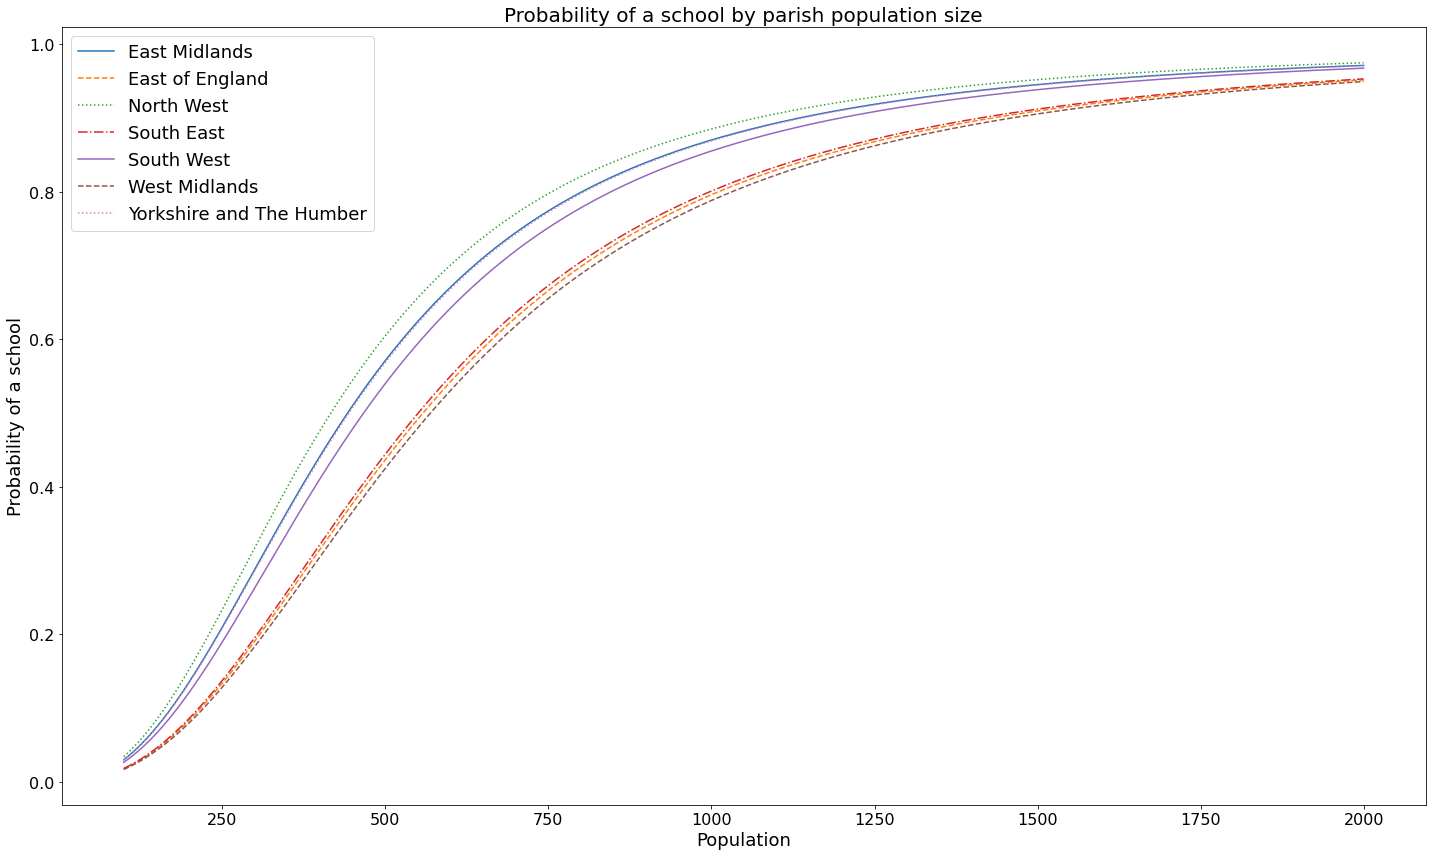

In [774]:
fig, ax = plt.subplots(figsize=(20,12))
i = 0
ls = ['-', '--', ':', '-.']
for region, frame in wide_pred_frame.groupby(['region']):
    plt.plot(frame.population, frame.prob_school, label=region, ls=ls[i%len(ls)])
    i += 1

plt.legend(fontsize=18)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Probability of a school', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Probability of a school by parish population size', fontsize=20)
plt.tight_layout()
plt.savefig('prob_school_by_region.png')
plt.show()

In [775]:
wide_pred_frame[wide_pred_frame.prob_school >= 0.5].sort_values(by='prob_school', ascending=True).head(7).sort_values(by='population')

,population,weighted_imd,region,area,ln_area,ln_population,East Midlands,East of England,North West,South East,South West,West Midlands,Yorkshire and The Humber,prob_worship,prob_school,prob_pub
6018,418,19217.282754,North West,1.173960e+07,16.278478,6.035481,0,0,1,0,0,0,0,0.840412,0.501023,0.651288
7943,443,19217.282754,East Midlands,1.173960e+07,16.278478,6.093570,1,0,0,0,0,0,0,0.959851,0.500144,0.702477
345,445,19217.282754,Yorkshire and The Humber,1.173960e+07,16.278478,6.098074,0,0,0,0,0,0,1,0.890776,0.500114,0.760405
9868,468,19217.282754,South West,1.173960e+07,16.278478,6.148468,0,0,0,0,1,0,0,0.991395,0.500724,0.717952
4251,551,19217.282754,South East,1.173960e+07,16.278478,6.311735,0,0,0,1,0,0,0,0.982797,0.500012,0.850354
11859,559,19217.282754,East of England,1.173960e+07,16.278478,6.326149,0,1,0,0,0,0,0,0.989826,0.500688,0.720570
2370,570,19217.282754,West Midlands,1.173960e+07,16.278478,6.345636,0,0,0,0,0,1,0,0.973482,0.500211,0.789720


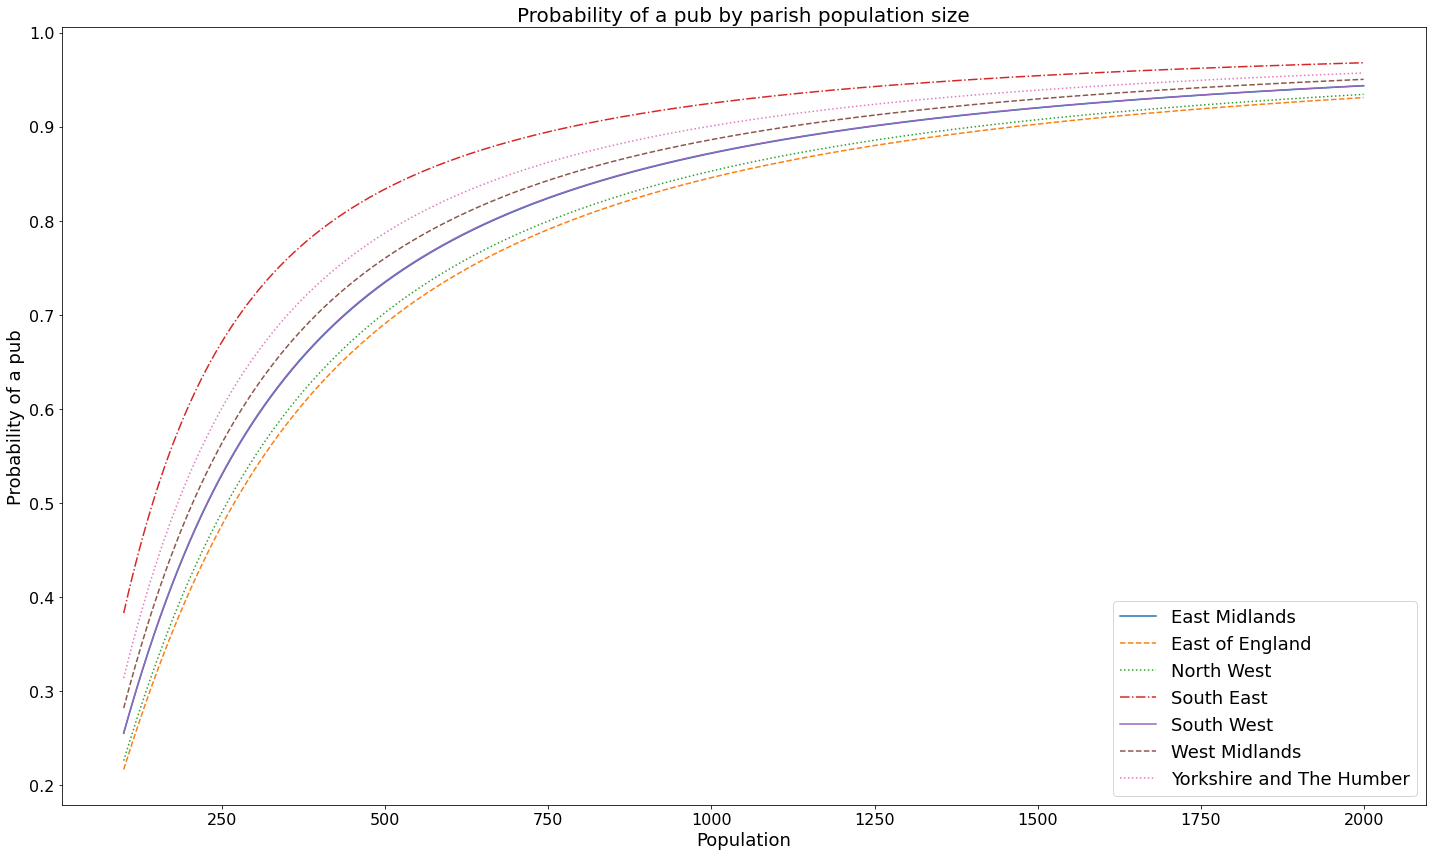

In [776]:
fig, ax = plt.subplots(figsize=(20,12))
i = 0
ls = ['-', '--', ':', '-.']
for region, frame in wide_pred_frame.groupby(['region']):
    plt.plot(frame.population, frame.prob_pub, label=region, ls=ls[i%len(ls)])
    i += 1

plt.legend(fontsize=18)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Probability of a pub', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Probability of a pub by parish population size', fontsize=20)
plt.tight_layout()
plt.savefig('prob_pub_by_region.png')
plt.show()

In [777]:
wide_pred_frame[wide_pred_frame.prob_pub >= 0.5].sort_values(by='prob_pub', ascending=True).head(7).sort_values(by='population')

,population,weighted_imd,region,area,ln_area,ln_population,East Midlands,East of England,North West,South East,South West,West Midlands,Yorkshire and The Humber,prob_worship,prob_school,prob_pub
3845,145,19217.282754,South East,1.173960e+07,16.278478,4.976734,0,0,0,1,0,0,0,0.963433,0.042388,0.501089
83,183,19217.282754,Yorkshire and The Humber,1.173960e+07,16.278478,5.209486,0,0,0,0,0,0,1,0.829708,0.111585,0.500346
2006,206,19217.282754,West Midlands,1.173960e+07,16.278478,5.327876,0,0,0,0,0,1,0,0.953159,0.085027,0.500510
9628,228,19217.282754,South West,1.173960e+07,16.278478,5.429346,0,0,0,0,1,0,0,0.987001,0.157564,0.500200
7729,229,19217.282754,East Midlands,1.173960e+07,16.278478,5.433722,1,0,0,0,0,0,0,0.942223,0.176483,0.500636
5859,259,19217.282754,North West,1.173960e+07,16.278478,5.556828,0,0,1,0,0,0,0,0.799603,0.247181,0.500836
11570,270,19217.282754,East of England,1.173960e+07,16.278478,5.598422,0,1,0,0,0,0,0,0.984568,0.154896,0.500649


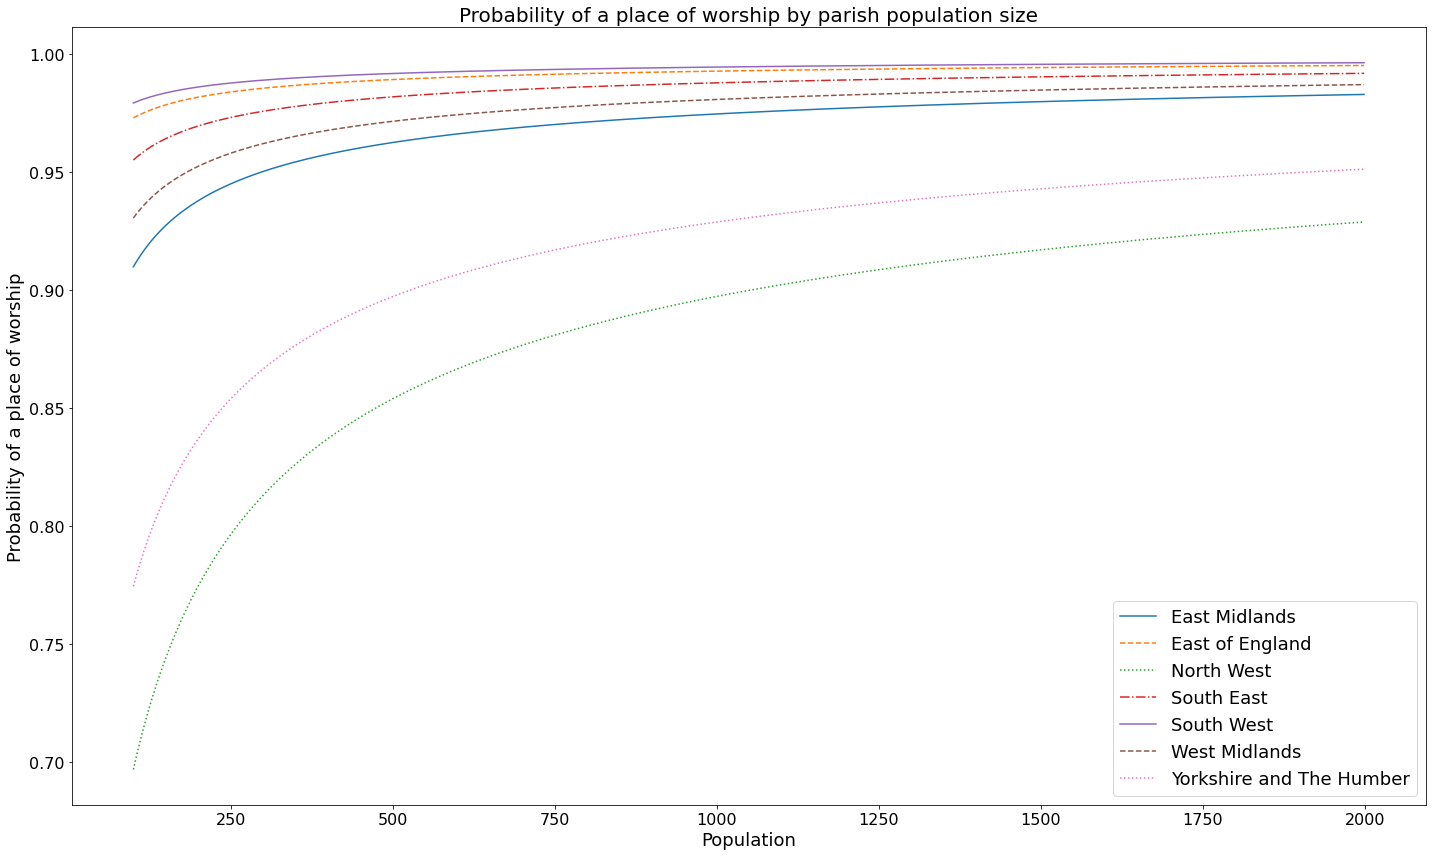

In [778]:
fig, ax = plt.subplots(figsize=(20,12))
i = 0
ls = ['-', '--', ':', '-.']
for region, frame in wide_pred_frame.groupby(['region']):
    plt.plot(frame.population, frame.prob_worship, label=region, ls=ls[i%len(ls)])
    i += 1

plt.legend(fontsize=18)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Probability of a place of worship', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Probability of a place of worship by parish population size', fontsize=20)
plt.tight_layout()
plt.savefig('prob_worship_by_region.png')
plt.show()

### By IMD

In [779]:
np.max(predictor_frame.weighted_imd)

32828.0

In [780]:
avg_populations = np.mean(predictor_frame.population)
avg_area = np.mean(predictor_frame.area)
dummy_imds = np.arange(np.min(predictor_frame.weighted_imd), np.max(predictor_frame.weighted_imd))
regions = predictor_frame.region.drop_duplicates()
handy_frame = pd.DataFrame(columns=['population', 'region', 'area', 'weighted_imd'])
frame_base = {
    'population': [],
    'weighted_imd': [],
    'region': [],
    'area': []
}
for region in regions:
    for imd in dummy_imds:
        frame_base['population'].append(avg_populations)
        frame_base['weighted_imd'].append(imd)
        frame_base['region'].append(region)
        frame_base['area'].append(avg_area)

to_pred_frame = pd.DataFrame(frame_base)
to_pred_frame.head()

,population,weighted_imd,region,area
0,903.198855,322.0,Yorkshire and The Humber,1.173960e+07
1,903.198855,323.0,Yorkshire and The Humber,1.173960e+07
2,903.198855,324.0,Yorkshire and The Humber,1.173960e+07
3,903.198855,325.0,Yorkshire and The Humber,1.173960e+07
4,903.198855,326.0,Yorkshire and The Humber,1.173960e+07


In [781]:
to_pred_frame.loc[:, 'ln_area'] = np.log(to_pred_frame.area)
to_pred_frame.loc[:, 'ln_population'] = np.log(to_pred_frame.population)
to_pred_frame.head()

,population,weighted_imd,region,area,ln_area,ln_population
0,903.198855,322.0,Yorkshire and The Humber,1.173960e+07,16.278478,6.805943
1,903.198855,323.0,Yorkshire and The Humber,1.173960e+07,16.278478,6.805943
2,903.198855,324.0,Yorkshire and The Humber,1.173960e+07,16.278478,6.805943
3,903.198855,325.0,Yorkshire and The Humber,1.173960e+07,16.278478,6.805943
4,903.198855,326.0,Yorkshire and The Humber,1.173960e+07,16.278478,6.805943


In [782]:
wide_pred_frame = pd.concat([to_pred_frame,pd.get_dummies(to_pred_frame.region)], axis=1)
wide_pred_frame.loc[:, 'prob_worship'] = log_reg_worship.predict(wide_pred_frame)
wide_pred_frame.loc[:, 'prob_school'] = log_reg_school.predict(wide_pred_frame)
wide_pred_frame.loc[:, 'prob_pub'] = log_reg.predict(wide_pred_frame)
wide_pred_frame.head()

,population,weighted_imd,region,area,ln_area,ln_population,East Midlands,East of England,North West,South East,South West,West Midlands,Yorkshire and The Humber,prob_worship,prob_school,prob_pub
0,903.198855,322.0,Yorkshire and The Humber,1.173960e+07,16.278478,6.805943,0,0,0,0,0,0,1,0.889208,0.752721,0.826479
1,903.198855,323.0,Yorkshire and The Humber,1.173960e+07,16.278478,6.805943,0,0,0,0,0,0,1,0.889211,0.752727,0.826483
2,903.198855,324.0,Yorkshire and The Humber,1.173960e+07,16.278478,6.805943,0,0,0,0,0,0,1,0.889213,0.752732,0.826487
3,903.198855,325.0,Yorkshire and The Humber,1.173960e+07,16.278478,6.805943,0,0,0,0,0,0,1,0.889215,0.752737,0.826491
4,903.198855,326.0,Yorkshire and The Humber,1.173960e+07,16.278478,6.805943,0,0,0,0,0,0,1,0.889217,0.752742,0.826495


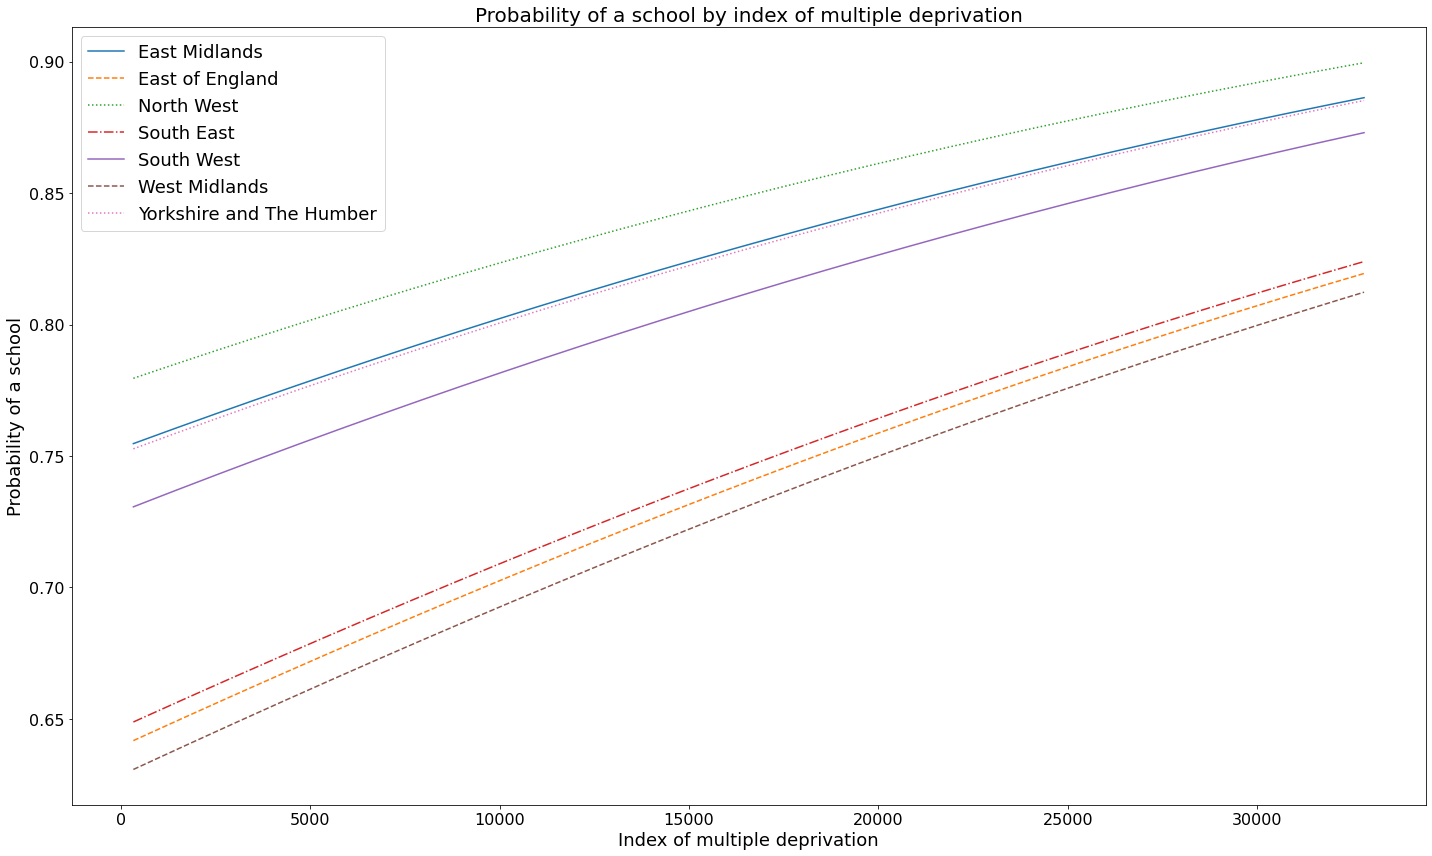

In [783]:
fig, ax = plt.subplots(figsize=(20,12))
i = 0
ls = ['-', '--', ':', '-.']
for region, frame in wide_pred_frame.groupby(['region']):
    plt.plot(frame.weighted_imd, frame.prob_school, label=region, ls=ls[i%len(ls)])
    i += 1

plt.legend(fontsize=18)
plt.xlabel('Index of multiple deprivation', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Probability of a school', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Probability of a school by index of multiple deprivation', fontsize=20)
plt.tight_layout()
plt.savefig('prob_school_by_region_by_imd.png')
plt.show()

### Most surprising omissions

In [784]:
wide_frame.head()

,pub,school,place_of_worship,weighted_imd,area,region,population,name,ln_area,ln_population,pub_bool,school_bool,worship_bool,East Midlands,East of England,North West,South East,South West,West Midlands,Yorkshire and The Humber
0,2,1,2,30238.0,7.898754e+06,Yorkshire and The Humber,1203,Bradleys Both,15.882216,7.092574,1,1,1,0,0,0,0,0,0,1
1,2,1,1,23934.0,6.695996e+06,Yorkshire and The Humber,1469,Cononley,15.717020,7.292337,1,1,1,0,0,0,0,0,0,1
2,0,0,1,30238.0,1.691419e+06,Yorkshire and The Humber,481,Farnhill,14.341078,6.175867,0,0,1,0,0,0,0,0,0,1
3,1,1,2,30238.0,3.710505e+06,Yorkshire and The Humber,222,Kildwick,15.126678,5.402677,1,1,1,0,0,0,0,0,0,1
4,1,1,2,23934.0,1.084977e+07,Yorkshire and The Humber,509,Lothersdale,16.199655,6.232448,1,1,1,0,0,0,0,0,0,1


In [785]:
wide_frame.loc[:, 'prob_worship'] = log_reg_worship.predict(wide_frame)
wide_frame.loc[:, 'prob_school'] = log_reg_school.predict(wide_frame)
wide_frame.loc[:, 'prob_pub'] = log_reg.predict(wide_frame)
wide_frame.head()

,pub,school,place_of_worship,weighted_imd,area,region,population,name,ln_area,ln_population,...,East Midlands,East of England,North West,South East,South West,West Midlands,Yorkshire and The Humber,prob_worship,prob_school,prob_pub
0,2,1,2,30238.0,7.898754e+06,Yorkshire and The Humber,1203,Bradleys Both,15.882216,7.092574,...,0,0,0,0,0,0,1,0.924187,0.922522,0.930282
1,2,1,1,23934.0,6.695996e+06,Yorkshire and The Humber,1469,Cononley,15.717020,7.292337,...,0,0,0,0,0,0,1,0.908689,0.936805,0.931821
2,0,0,1,30238.0,1.691419e+06,Yorkshire and The Humber,481,Farnhill,14.341078,6.175867,...,0,0,0,0,0,0,1,0.580060,0.428107,0.690388
3,1,1,2,30238.0,3.710505e+06,Yorkshire and The Humber,222,Kildwick,15.126678,5.402677,...,0,0,0,0,0,0,1,0.671270,0.144781,0.525879
4,1,1,2,23934.0,1.084977e+07,Yorkshire and The Humber,509,Lothersdale,16.199655,6.232448,...,0,0,0,0,0,0,1,0.900144,0.602796,0.806392


In [786]:
wide_frame.loc[:, 'pub_surprise'] = wide_frame.pub_bool - wide_frame.prob_pub
wide_frame.loc[:, 'school_surprise'] = wide_frame.school_bool - wide_frame.prob_school
wide_frame.loc[:, 'worship_surprise'] = wide_frame.worship_bool - wide_frame.prob_worship

In [787]:
wide_frame.sort_values(by='pub_surprise').head()

,pub,school,place_of_worship,weighted_imd,area,region,population,name,ln_area,ln_population,...,South East,South West,West Midlands,Yorkshire and The Humber,prob_worship,prob_school,prob_pub,pub_surprise,school_surprise,worship_surprise
3081,0,4,5,21442.342124,1.598800e+07,East Midlands,5650,Ruskington,16.587349,8.639411,...,0,0,0,0,0.993505,0.997839,0.987188,-0.987188,0.002161,0.006495
4645,0,1,5,28000.460996,1.464049e+07,East of England,4538,Knebworth,16.499302,8.420242,...,0,0,0,0,0.998026,0.994696,0.981836,-0.981836,0.005304,0.001974
2215,0,1,2,32621.000000,5.248724e+06,South East,2962,South Wonston,15.473496,7.993620,...,1,0,0,0,0.988603,0.981731,0.981506,-0.981506,0.018269,0.011397
782,0,2,1,23835.432871,1.866658e+07,North West,4186,Hesketh-with-Becconsall,16.742245,8.339501,...,0,0,0,0,0.973314,0.996682,0.980570,-0.980570,0.003318,0.026686
3752,0,1,1,19494.987999,4.672770e+06,South East,3333,Tangmere,15.357263,8.111628,...,1,0,0,0,0.983873,0.978899,0.976416,-0.976416,0.021101,0.016127


In [788]:
wide_frame.sort_values(by='pub_surprise', ascending=False).head()

,pub,school,place_of_worship,weighted_imd,area,region,population,name,ln_area,ln_population,...,South East,South West,West Midlands,Yorkshire and The Humber,prob_worship,prob_school,prob_pub,pub_surprise,school_surprise,worship_surprise
1240,1,0,1,10163.0,3.202055e+06,South West,102,Monksilver,14.979303,4.624973,...,0,1,0,0,0.906487,0.012850,0.142557,0.857443,-0.012850,0.093513
4162,1,0,1,17869.0,1.951660e+06,South West,105,Butterleigh,14.484191,4.653960,...,0,1,0,0,0.873615,0.014001,0.149331,0.850669,-0.014001,0.126385
1879,1,0,1,13559.0,4.251930e+06,East of England,108,Wiveton,15.262884,4.682131,...,0,0,0,0,0.917743,0.012000,0.149914,0.850086,-0.012000,0.082257
1162,1,0,1,16731.0,1.163563e+06,South West,126,Seavington St Michael,13.966997,4.836282,...,0,1,0,0,0.811667,0.016769,0.149934,0.850066,-0.016769,0.188333
2040,1,0,1,12525.0,4.383810e+06,East of England,125,Wheatacre,15.293429,4.828314,...,0,0,0,0,0.924569,0.016519,0.173402,0.826598,-0.016519,0.075431


In [789]:
wide_frame.sort_values(by='school_surprise').head()

,pub,school,place_of_worship,weighted_imd,area,region,population,name,ln_area,ln_population,...,South East,South West,West Midlands,Yorkshire and The Humber,prob_worship,prob_school,prob_pub,pub_surprise,school_surprise,worship_surprise
634,1,0,1,31872.149579,7.403694e+06,South East,4272,East Horsley,15.817490,8.359837,...,1,0,0,0,0.993476,0.993019,0.989651,0.010349,-0.993019,0.006524
2290,3,0,4,14734.885277,1.825062e+07,South East,3199,Pevensey,16.719710,8.070594,...,1,0,0,0,0.995658,0.984610,0.983217,0.016783,-0.984610,0.004342
691,1,0,0,10305.000000,7.534208e+06,North West,2544,Ulnes Walton,15.834964,7.841493,...,0,0,0,0,0.884262,0.977831,0.927897,0.072103,-0.977831,-0.884262
3382,3,0,2,8795.581781,1.397643e+07,South East,2898,St. Mary in the Marsh,16.452883,7.971776,...,1,0,0,0,0.993027,0.974656,0.975331,0.024669,-0.974656,0.006973
2174,1,0,1,24711.000000,1.891132e+07,South East,2066,Over Wallop,16.755271,7.633370,...,1,0,0,0,0.995700,0.968847,0.977850,0.022150,-0.968847,0.004300


In [790]:
wide_frame.sort_values(by='school_surprise', ascending=False).head()

,pub,school,place_of_worship,weighted_imd,area,region,population,name,ln_area,ln_population,...,South East,South West,West Midlands,Yorkshire and The Humber,prob_worship,prob_school,prob_pub,pub_surprise,school_surprise,worship_surprise
3715,1,1,2,14651.0,8.364166e+06,South East,113,Eartham,15.939467,4.727388,...,1,0,0,0,0.934726,0.018558,0.360068,0.639932,0.981442,0.065274
4639,1,1,1,17498.0,6.003138e+06,East of England,123,Hexton,15.607793,4.812184,...,0,0,0,0,0.950016,0.020748,0.209914,0.790086,0.979252,0.049984
1300,0,1,1,16178.0,3.027205e+06,West Midlands,149,Madresfield,14.923150,5.003946,...,0,0,1,0,0.787337,0.022538,0.263505,-0.263505,0.977462,0.212663
4052,1,1,1,23891.0,7.079458e+06,West Midlands,123,Marston,15.772708,4.812184,...,0,0,1,0,0.907148,0.025284,0.323630,0.676370,0.974716,0.092852
4068,0,1,1,11367.0,7.450049e+06,West Midlands,149,Hollinsclough,15.823731,5.003946,...,0,0,1,0,0.896818,0.028152,0.308243,-0.308243,0.971848,0.103182


In [791]:
wide_frame.sort_values(by='worship_surprise', ascending=True).head()

,pub,school,place_of_worship,weighted_imd,area,region,population,name,ln_area,ln_population,...,South East,South West,West Midlands,Yorkshire and The Humber,prob_worship,prob_school,prob_pub,pub_surprise,school_surprise,worship_surprise
2655,1,1,0,30557.00000,1.437074e+07,East of England,2091,Great Barton,16.480705,7.645398,...,0,0,0,0,0.997024,0.970402,0.954623,0.045377,0.029598,-0.997024
4778,0,2,0,23438.33465,1.554497e+07,South West,1013,Hamfallow,16.559248,6.920672,...,0,1,0,0,0.996277,0.885031,0.896644,-0.896644,0.114969,-0.996277
4432,1,1,0,21095.00000,2.247215e+07,South West,507,Whitchurch,16.927787,6.228511,...,0,1,0,0,0.996046,0.624158,0.792754,0.207246,0.375842,-0.996046
2120,3,0,0,13055.00000,7.141533e+07,South East,317,Denny Lodge,18.084023,5.758902,...,1,0,0,0,0.995988,0.324342,0.825535,0.174465,-0.324342,-0.995988
4802,0,0,0,23379.00000,1.662893e+07,South West,742,Alkington,16.626654,6.609349,...,0,1,0,0,0.995847,0.792426,0.855812,-0.855812,-0.792426,-0.995847


In [792]:
wide_frame.sort_values(by='worship_surprise', ascending=False).head()

,pub,school,place_of_worship,weighted_imd,area,region,population,name,ln_area,ln_population,...,South East,South West,West Midlands,Yorkshire and The Humber,prob_worship,prob_school,prob_pub,pub_surprise,school_surprise,worship_surprise
984,0,0,1,21151.0,2.128683e+06,Yorkshire and The Humber,158,East Hardwick,14.571014,5.062595,...,0,0,0,1,0.430010,0.044965,0.309908,-0.309908,-0.044965,0.569990
273,1,0,1,18604.0,2.260012e+06,Yorkshire and The Humber,180,Finghall,14.630881,5.192957,...,0,0,0,1,0.450225,0.057326,0.336889,0.663111,-0.057326,0.549775
762,1,0,1,14835.0,3.038567e+06,North West,251,Newsholme,14.926897,5.525453,...,0,0,0,0,0.455873,0.134559,0.335871,0.664129,-0.134559,0.544127
708,0,0,1,21121.0,3.428329e+06,North West,181,Borwick,15.047584,5.198497,...,0,0,0,0,0.476080,0.083479,0.291393,-0.291393,-0.083479,0.523920
173,0,0,1,20977.0,2.944632e+06,Yorkshire and The Humber,145,Winksley,14.895494,4.976734,...,0,0,0,1,0.502771,0.041904,0.312040,-0.312040,-0.041904,0.497229
